# Determining the parameters that determine the success of games from the Strimchik online store

The project considers the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.
We have data up to 2016. Let's say it's December 2016 and we're planning a campaign for 2017. It is necessary to work out the principle of working with data.
The abbreviation ESRB (Entertainment Software Rating Board) is an association that determines the age rating of computer games in the data set. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

Description of the data.
- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
Data for 2016 may not be complete.

The content of the work:

<a href='#1'>Data preparation'</a>

<a href='#2'>Exploratory data analysis'</a>

<a href='#3'>Compiling a portrait of a user in each region'</a>

<a href='#4'>Hypothesis testing'</a>

<a href='#5'>General conclusion'</a>

I open the file with the games and study the general information.

In [215]:
import pandas as pd#Importing the pandas library
data = pd.read_csv('/datasets/games.csv')#Reading a file
data.info()#I display general information about the file on the screen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The data has been read. As can be seen from the general information, there are gaps in the columns, I will deal with them further.

In [216]:
data#I display the table for viewing

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Conclusion: Dadaset was read normally, but there are gaps in the columns and some data types can be corrected. Missing columns: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

<a id='1'></a>

# Подготовка данных

In [217]:
data.columns = data.columns.str.lower()#Convert column names to lowercase

In [218]:
data#checking

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [219]:
po = pd.DataFrame(data.loc[data['year_of_release'].isna()==False]['name'].isin(data[data['year_of_release'].isna()==True]['name']))#Let's see how many gaps match in name with those lines where there are no gaps
print('The number of gaps that it is possible to get rid of by replacing by name-',len(po[po['name']==True]))#

Число пропусков, от которых есть возможность избавиться заменой по названию- 204


I will try to replace gaps in the release date column by title

In [220]:
hj = pd.DataFrame(data.loc[data['year_of_release'].isna()==False])#For the i-th column I create a table in which there are no gaps in the i-th column
po = pd.DataFrame(data.loc[data['year_of_release'].isna()==True]['name'].isin(data[data['year_of_release'].isna()==False]['name']))#For the i-th column, I create a table of names of video games, and these names match both the missing elements and the filled elements of the i-th column
for n in po.index:#Loop through indexes
    ss = po.loc[n].bool()#I store in a variable the boolean value of the ro table corresponding to the given index number
    if ss == True:#All elements with a value of True are where there is a match in the name of the i-th system with gaps and with filled values
        for a in hj.index:#Loop rows of titles in a table without gaps
            b = hj.loc[a, 'name']
            if b == data.loc[n,'name']:#Replacement condition, namely: if by enumeration of all values of the name without gaps, there is some name that is equal to the name with a gap. That:
                data.loc[n,'year_of_release'] = hj.loc[a, 'year_of_release']#Replacing missing value by name in source table

In [221]:
data.info()#checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [222]:
data[data['year_of_release'].isna()==True]#I look at the quality of the data in the passes with the date

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


To bring the data to the desired type in the year column, I will replace the gaps with the conditional year 1000, so it will be easier to work with the column, but we must not forget that this is a forced replacement with an indicator value.

In [223]:
data['year_of_release'] = data['year_of_release'].fillna(1000.0)#Filling in the blanks

In [224]:
data['year_of_release'] = data['year_of_release'].astype('int')#Convert date to years
data.info()#checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [225]:
data[data['genre'].isna()==True]#I'll take a look at the lines with the skipped genre
#Missing genre lines matched missing titles

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [226]:
data = data.dropna(subset = ['name'])#Delete lines with missing title and genre
data.info()#checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [227]:
len(data.loc[data['user_score'] == 'tbd']['genre'])

2424

In [228]:
data.loc[data['user_score'] == 'tbd']['name'].isin(data[data['user_score'].isna()==False]['name'])

119      True
301      True
520      True
645      True
657      True
         ... 
16695    True
16697    True
16698    True
16704    True
16706    True
Name: name, Length: 2424, dtype: bool

In [229]:
data['critic_score'].unique()#I check for outliers in the column, as you can see: there are no outliers, all data match the description

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [230]:
data['critic_score'] = data['critic_score'].fillna(-1)#I replace the gaps with the indicator value -1 to convert the column to a workable type
data['critic_score'] = data['critic_score'].astype('int')#Converting a column to an integer type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [231]:
data['user_score'].unique()#I check for outliers in the column, as you can see: there is an incomprehensible value, in the form of tbd

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [232]:
print('the number of rows with the value "tbd", in the user_score column is:',len(data.loc[data['user_score'] == 'tbd']['genre']))

количество строк со значением "tbd", в столбце user_score равно: 2424


Parsing the "tbd" attribute.

In [233]:
gggh = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'jp_sales', 'other_sales', 'critic_score', 'rating']#I create a list of possible attribute covariances 
for r in gggh:#I sort through all the possible top 6 to identify the dependence
    print('Top 6 unique values ​​by column', r, 'из tbd в user_score')
    print()
    print(data.loc[data['user_score'] == 'tbd'][r].value_counts().head(6))
    print()

Топ 6 уникальных значений по столбцу name из tbd в user_score

Wipeout 2                                         5
Rapala Pro Bass Fishing 2010                      5
DreamWorks Super Star Kartz                       5
Ben 10 Galactic Racing                            5
Bakugan Battle Brawlers: Defenders of the Core    5
Just Dance 2017                                   5
Name: name, dtype: int64

Топ 6 уникальных значений по столбцу platform из tbd в user_score

DS     756
Wii    440
GBA    262
PS2    240
XB     150
PSP    123
Name: platform, dtype: int64

Топ 6 уникальных значений по столбцу year_of_release из tbd в user_score

2009    405
2010    332
2008    330
2011    218
2002    195
2007    193
Name: year_of_release, dtype: int64

Топ 6 уникальных значений по столбцу genre из tbd в user_score

Misc          449
Sports        413
Action        376
Simulation    237
Racing        233
Puzzle        211
Name: genre, dtype: int64

Топ 6 уникальных значений по столбцу na_sales из tbd в

The tbd attribute doesn't really stand out anywhere except for low sales in general, and especially it didn't sell much in Japan.

In [234]:
data['user_score'] = data['user_score'].replace('tbd', -1)#Count remaining tbds as gaps and replace with -1
data['user_score'] = data['user_score'].fillna(-1)#I replace gaps with -1
data['user_score'] = data['user_score'].astype('float')#I bring the column to a convenient form
data['user_score'].unique()#I display the values on the screen for verification

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [235]:
data['rating'].unique()#Checking the values in a column

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [236]:
data['rating'] = data['rating'].replace('nan', 'undefined')#Fill in the gaps with a new categorical value

In [237]:
data = data.dropna(subset = ['name'])#Delete lines with missing title
data.info()#checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [238]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']#I create a column to calculate the total sales in all regions
data#checking

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN,0.01


I'll do a gap analysis.

In [239]:
hhj = ['critic_score', 'user_score']#I create a table for the cycle
jjh = ['name', 'platform', 'year_of_release', 'genre', 'sum_sales']#I create a table for the cycle
for i in hhj:
    for g in jjh:#I iterate over all possible dependencies for gaps
        print('Top 5 by column',g,', when passing to',i)
        print()
        print(data[data[i]==-1][g].value_counts().head(7))#Display top 5 column values for missing values
        print()
for g in jjh:#Since gaps were not replaced in the rating column, I create a separate automation loop for it
    print('Top 5 by rating column, with gaps in',i)
    print()
    print(data[data['rating'].isna()==True][g].value_counts().head(7))
    print()

Топ 5 по столбца name , при пропусках в critic_score

The Amazing Spider-Man 2 (2014)                                       7
FIFA 12                                                               7
Sonic & All-Stars Racing Transformed                                  6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
Rapala Pro Bass Fishing 2010                                          6
Adventure Time: Finn & Jake Investigations                            6
The Walking Dead: Season One                                          6
Name: name, dtype: int64

Топ 5 по столбца platform , при пропусках в critic_score

DS     1434
PS      997
PS2     863
PSP     747
Wii     735
PS3     511
GBA     384
Name: platform, dtype: int64

Топ 5 по столбца year_of_release , при пропусках в critic_score

2009    777
2010    759
2008    715
2011    646
2007    506
2006    388
2015    381
Name: year_of_release, dtype: int64

Топ 5 по столбца genre , при пропусках в critic_score

Act

As you can see, the passes roughly match across platforms, game titles, and years, and they also have a low number of sales. Most likely, these are less popular or have become free or already free games from the start.

In [240]:
data[data['year_of_release'] == '2016'].head(40)#Checking data for 2016, it has gaps

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


In [241]:
data.loc[data['critic_score']==-1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN,0.01


In [242]:
for i in data['year_of_release'].value_counts().index.sort_values():#I analyze whether the passes match the year of release
    print('До',i)#Until this year
    print(data.loc[(data['critic_score']==-1)&(data['year_of_release']<i)]['name'].count())#So many passes
    print()

До 1000
0

До 1980
84

До 1981
93

До 1982
139

До 1983
175

До 1984
192

До 1985
206

До 1986
219

До 1987
240

До 1988
256

До 1989
270

До 1990
287

До 1991
303

До 1992
344

До 1993
386

До 1994
446

До 1995
566

До 1996
785

До 1997
1040

До 1998
1313

До 1999
1664

До 2000
1964

До 2001
2171

До 2002
2327

До 2003
2530

До 2004
2722

До 2005
2924

До 2006
3208

До 2007
3596

До 2008
4102

До 2009
4817

До 2010
5594

До 2011
6353

До 2012
6999

До 2013
7333

До 2014
7605

До 2015
7925

До 2016
8306



In [243]:
for i in data['year_of_release'].value_counts().index.sort_values():#I analyze whether the passes match the year of release
    print('До',i)#Until this year
    print(data.loc[(data['user_score']==-1)&(data['year_of_release']<i)]['name'].count())#So many passes
    print()

До 1000
0

До 1980
96

До 1981
105

До 1982
151

До 1983
187

До 1984
204

До 1985
218

До 1986
231

До 1987
252

До 1988
268

До 1989
282

До 1990
299

До 1991
315

До 1992
356

До 1993
398

До 1994
458

До 1995
578

До 1996
797

До 1997
1052

До 1998
1324

До 1999
1672

До 2000
1980

До 2001
2223

До 2002
2448

До 2003
2817

До 2004
3079

До 2005
3353

До 2006
3711

До 2007
4169

До 2008
4738

До 2009
5510

До 2010
6325

До 2011
7119

До 2012
7764

До 2013
8081

До 2014
8322

До 2015
8574

До 2016
8883



In [244]:
for i in data['year_of_release'].value_counts().index.sort_values():#I analyze whether the passes match the year of release
    print('До',i)#Until this year
    print(data.loc[(data['rating'].isna()==True)&(data['year_of_release']<i)]['name'].count())#So many passes
    print()

До 1000
0

До 1980
65

До 1981
74

До 1982
120

До 1983
156

До 1984
173

До 1985
187

До 1986
200

До 1987
221

До 1988
237

До 1989
251

До 1990
268

До 1991
284

До 1992
325

До 1993
366

До 1994
426

До 1995
546

До 1996
765

До 1997
1021

До 1998
1291

До 1999
1638

До 2000
1935

До 2001
2137

До 2002
2280

До 2003
2455

До 2004
2618

До 2005
2783

До 2006
3017

До 2007
3346

До 2008
3722

До 2009
4170

До 2010
4587

До 2011
5047

До 2012
5488

До 2013
5786

До 2014
6015

До 2015
6251

До 2016
6542



In [245]:
print('Average across the entire sales column:',data['sum_sales'].mean())#I print the median of prodj for the entire sample
print('Average pass sales by passes in rating:',data.loc[(data['rating'].isna()==True)]['sum_sales'].mean())#I print the average value of sales for rows with gaps in the column
print('Average pass sales value in critic_score:',data.loc[(data['critic_score']==-1)]['sum_sales'].mean())#I print the average value of sales for rows with gaps in the column
print('Average pass sales in user_score:',data.loc[(data['user_score']==-1)]['sum_sales'].mean())#I print the average value of sales for rows with gaps in the column

Медиана по всему столбцу продаж: 0.5333147848979837
Медиана продаж по пропускам в rating: 0.4208914843287995
Медиана продаж по пропускам в critic_score: 0.38583255597014926
Медиана продаж по пропускам в user_score: 0.3620344185026855


Omissions in ratings do not depend on the time when the game was produced, most likely the presence of gaps indicates that the game is not very popular and they simply did not begin to evaluate it, since the average sales values ​​for passes are lower than the average sales for lines without gaps.

Conclusion: Data has been read and preprocessed. I removed 2 rows from the entire dataframe, as they had gaps in the name of the video game and this is almost impossible to recover. Gaps in columns did not replace, so as not to distort the data. Blanks have been replaced with indicator value -1 for column type conversion. The unique value 'tbd' in the column 'user_score' was found and analyzed. Replaced it with a new categorical attribute undefined. the data is ready for further work with them. Year gaps were partially replaced by the name column, and the rest were replaced by the indicator year 1000 to cast the column to a convenient type.

<a id='2'></a>

# Exploratory data analysis

I look at how many games were released in different years

Text(0.5, 0, 'Рассматриваемый год')

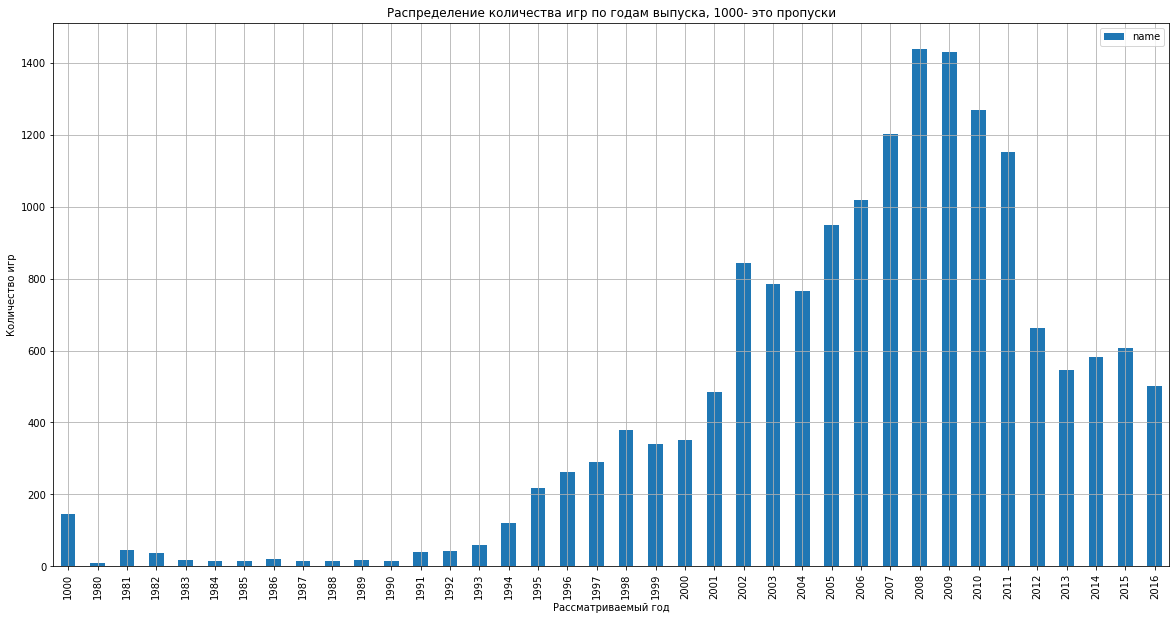

In [246]:
ax=(data#I will build a histogram of the distribution of the number of games by year of release
.pivot_table(index='year_of_release', values='name', aggfunc='count')#I group the table by release years, sum up the number for the year
.plot(title = 'Distribution of the number of games by year of release, 1000 are gaps', kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('Number of games')
ax.set_xlabel('Year in question')

The graph shows that the most games were produced in 2008 and 2009. Not all date periods are important for analysis, since until 1991 the number of games produced was consistently low, since our task is forecasting and, most likely, users hardly play games so often before 1991, both because there are few of them and because of due to their old age, they are significantly inferior to modern games, so I think that for our analysis, games before 1991 are not important. Although it is worth noting separately the peak in 1981, which is a non-standard value, albeit a small one.

Game Platform Analysis

I determine the top platforms

In [247]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending = False)#I group the names of the platforms, and for them I calculate the amount of sales, then I sort everything in descending order

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In my opinion, the top platforms can be distinguished from: PS2, X360, PS3, Wii, DS, PS

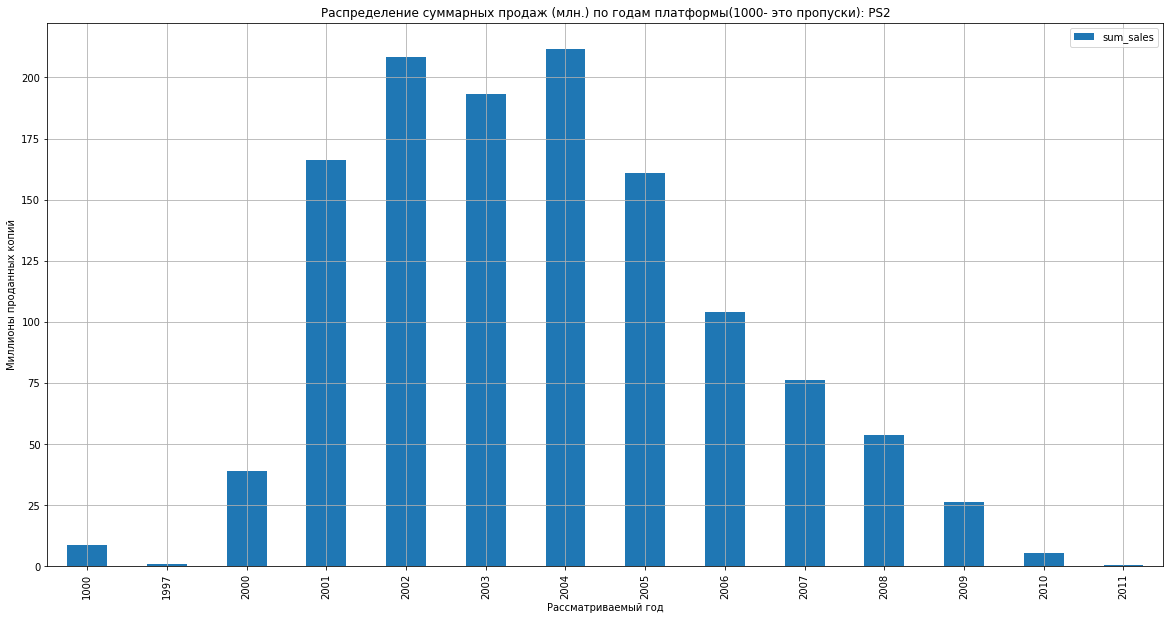

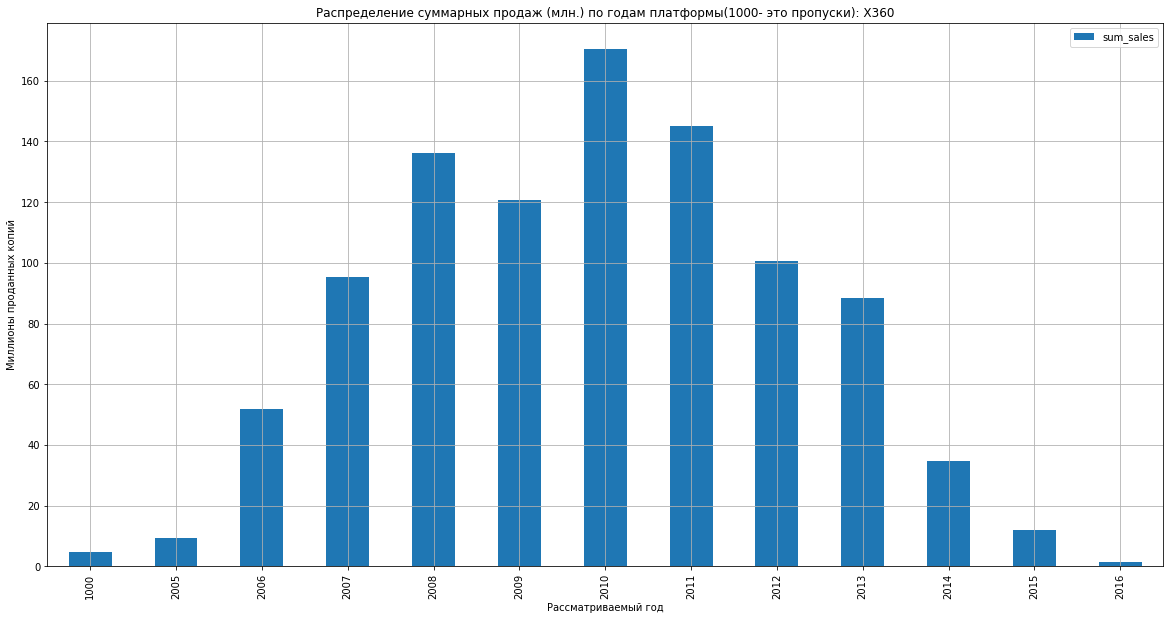

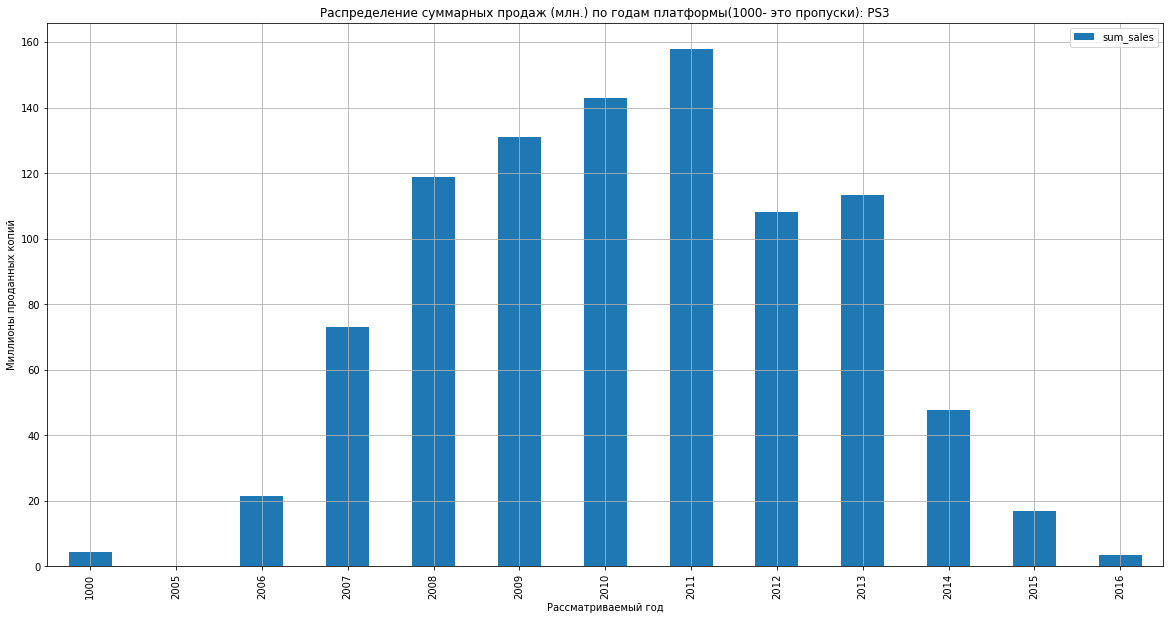

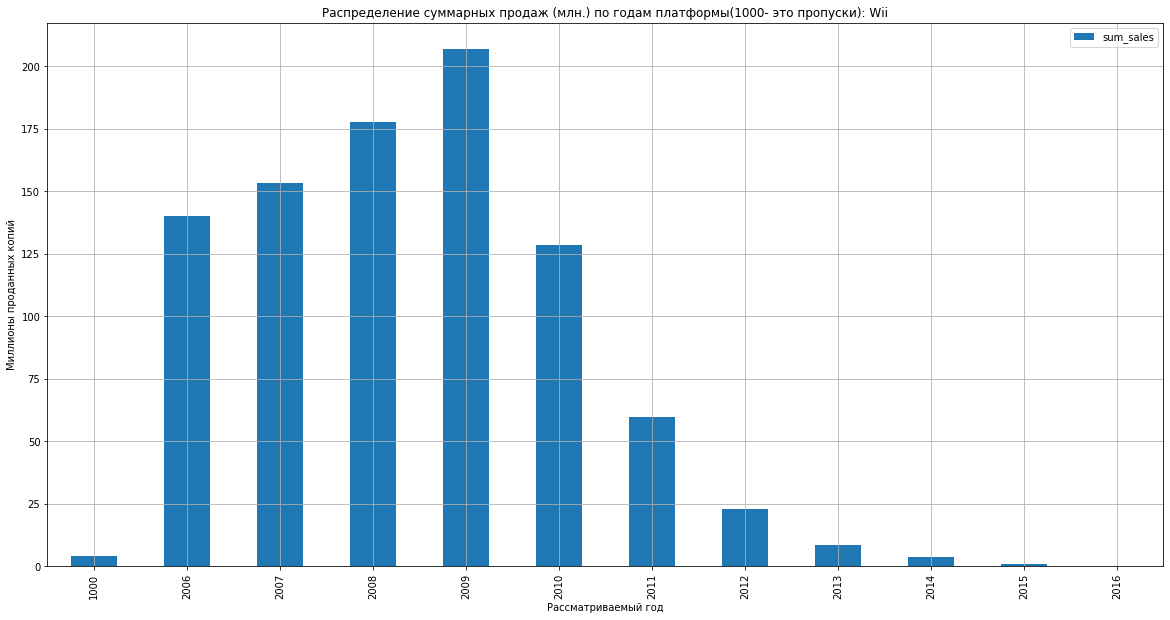

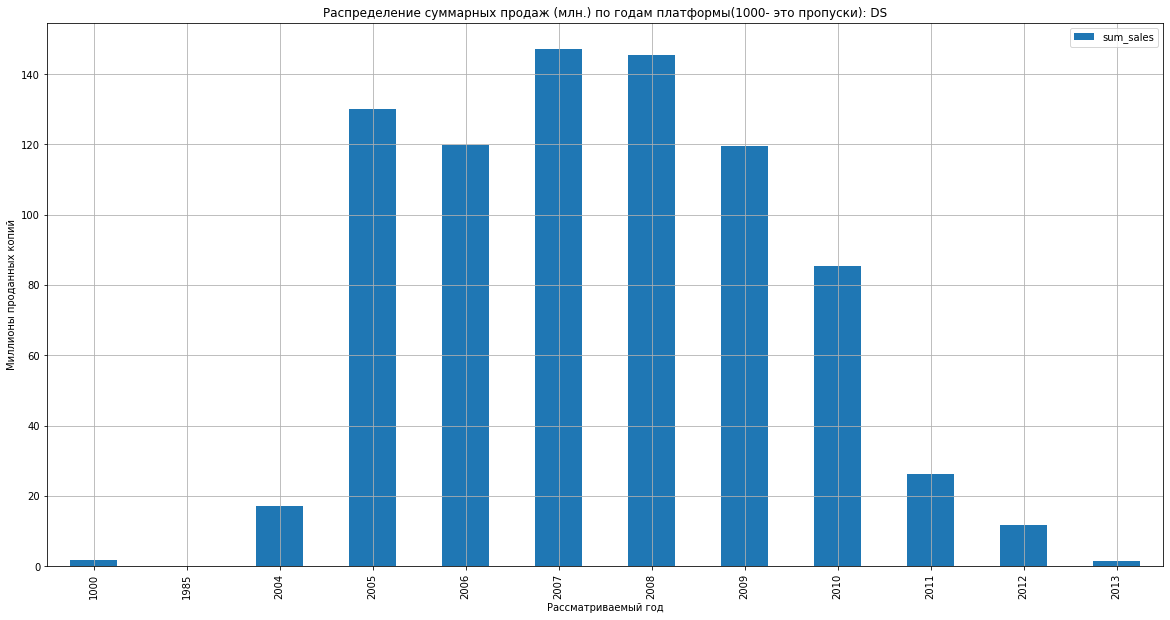

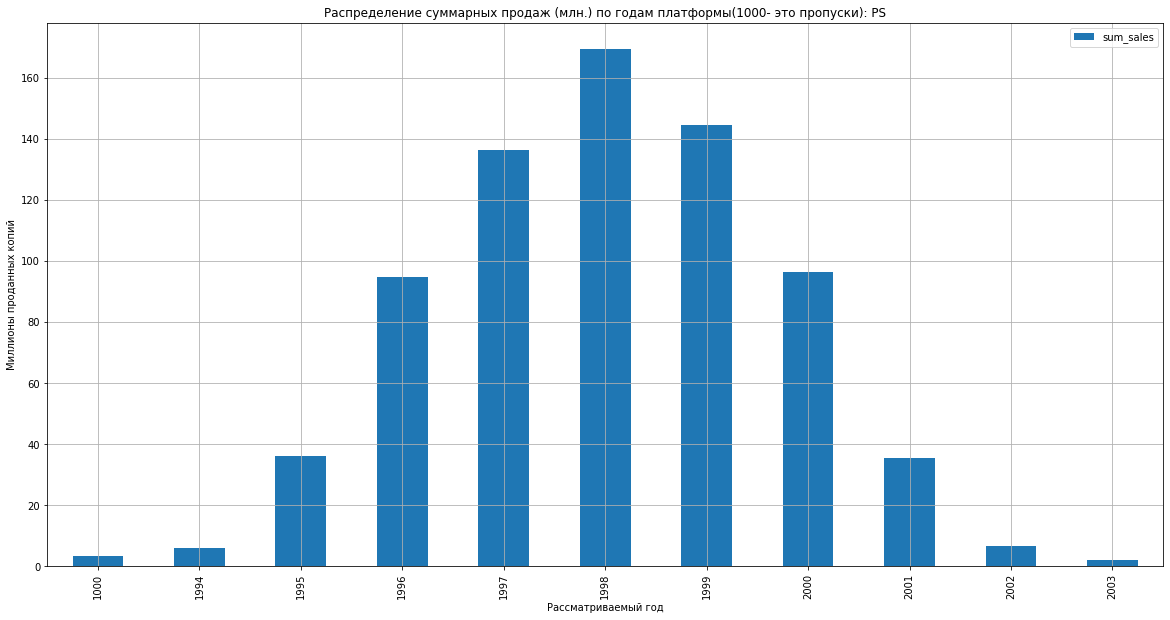

In [248]:
gh = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']#I create a list of selected platforms

for i in gh:
    ax = (data.loc[data['platform']==i]#I make a slice of data by platform
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')#I group the table by year of release for each I calculate the amount of sales by platform
     .plot(title = 'Distribution of total sales (millions) by platform years (1000 are gaps): {:}'.format(i) , kind='bar', figsize=(20, 10), grid=True, legend=True))
    ax.set_ylabel('Millions of copies sold')
    ax.set_xlabel('Year in question') 

The characteristic period for which new platforms appear and old ones disappear is 4-5 years.

I define the current period.

Text(0.5, 0, 'Рассматриваемый год')

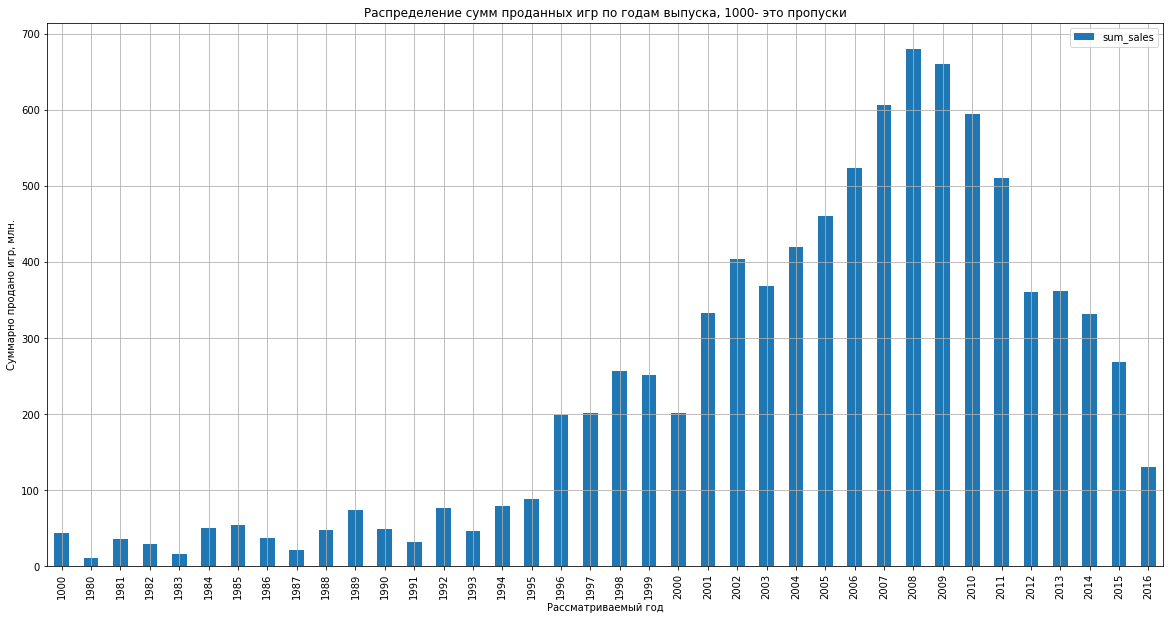

In [249]:
ax=(data#I will build a histogram of the distribution of total sales of games by year of release
.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')#I group the table by release years, sum up the number for the year
.plot(title = 'Distribution of the amount of games sold by year of release, 1000 are gaps', kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('Total games sold, mln.')
ax.set_xlabel('Year in question')

Judging by the number of games produced (see chart above), in terms of sales, I choose the current period - from 2012, inclusive.

Search for potentially profitable platforms.

In [250]:
data.query('year_of_release >= 2012').pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending = False)#I have been identifying sales leaders since 2012

,sum_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


I define the list of leading platforms as follows: PS4, PS3, X360, 3DS, XOne.

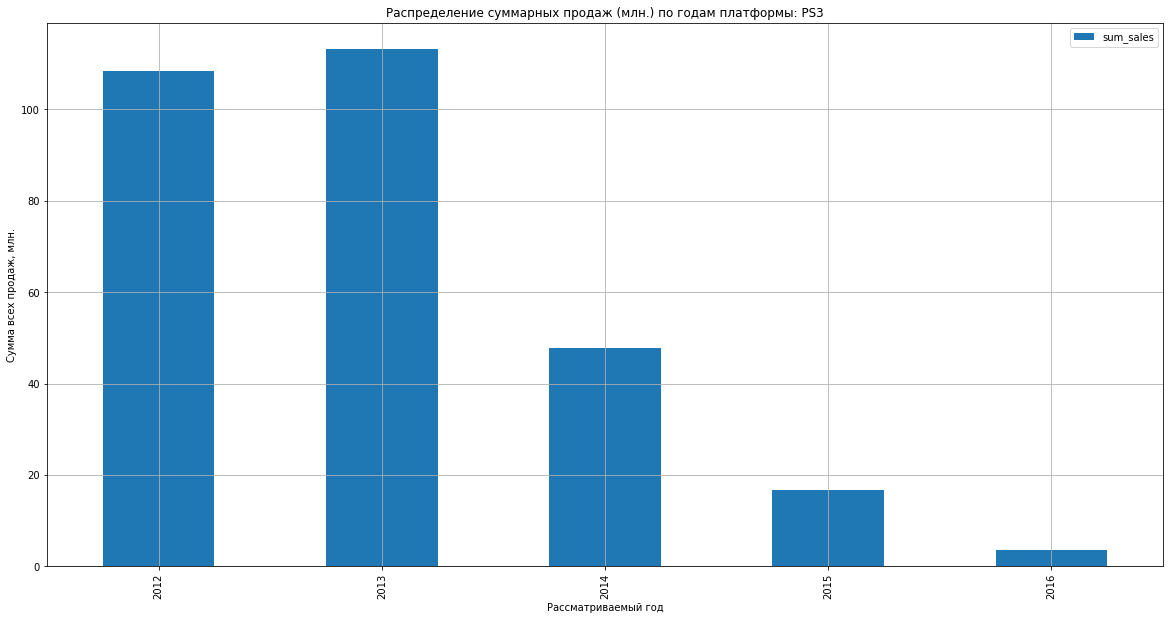

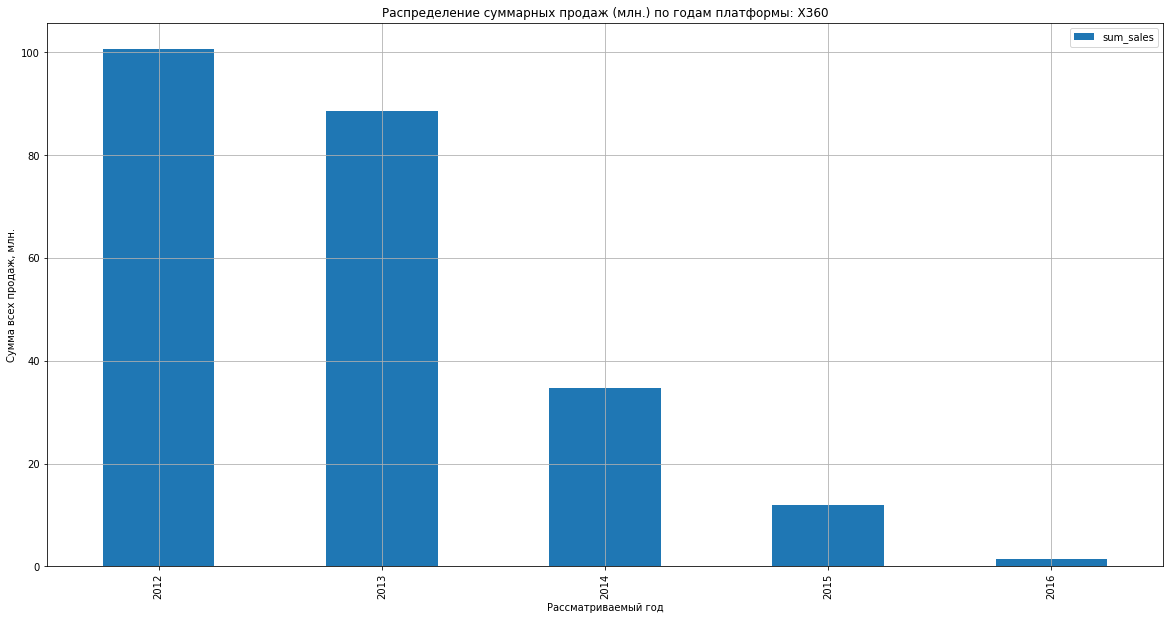

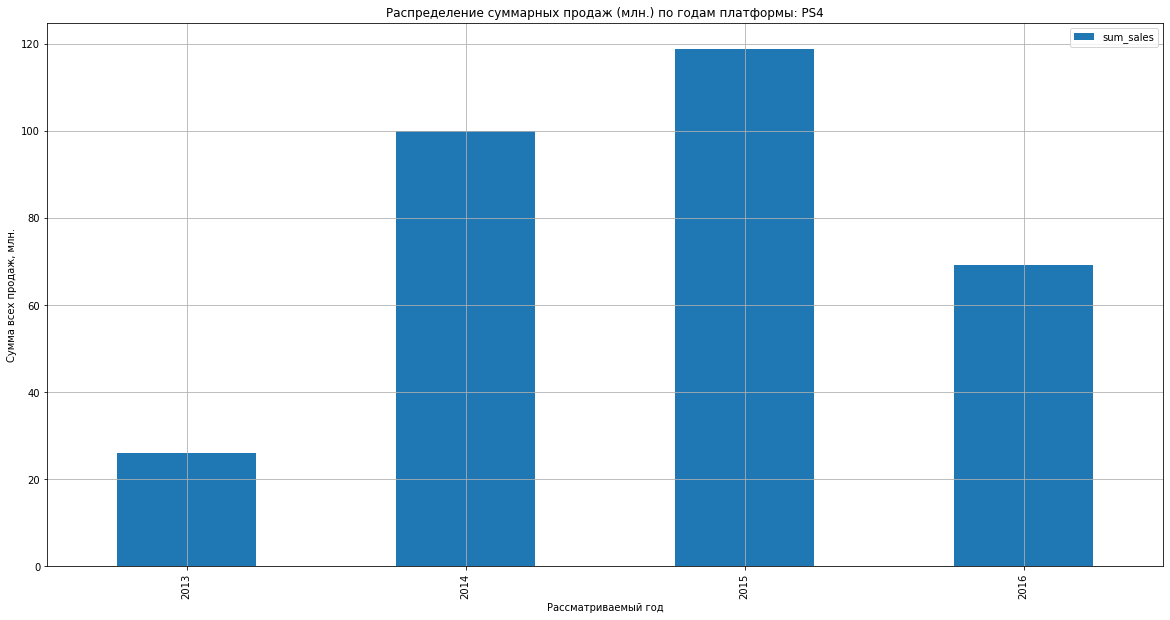

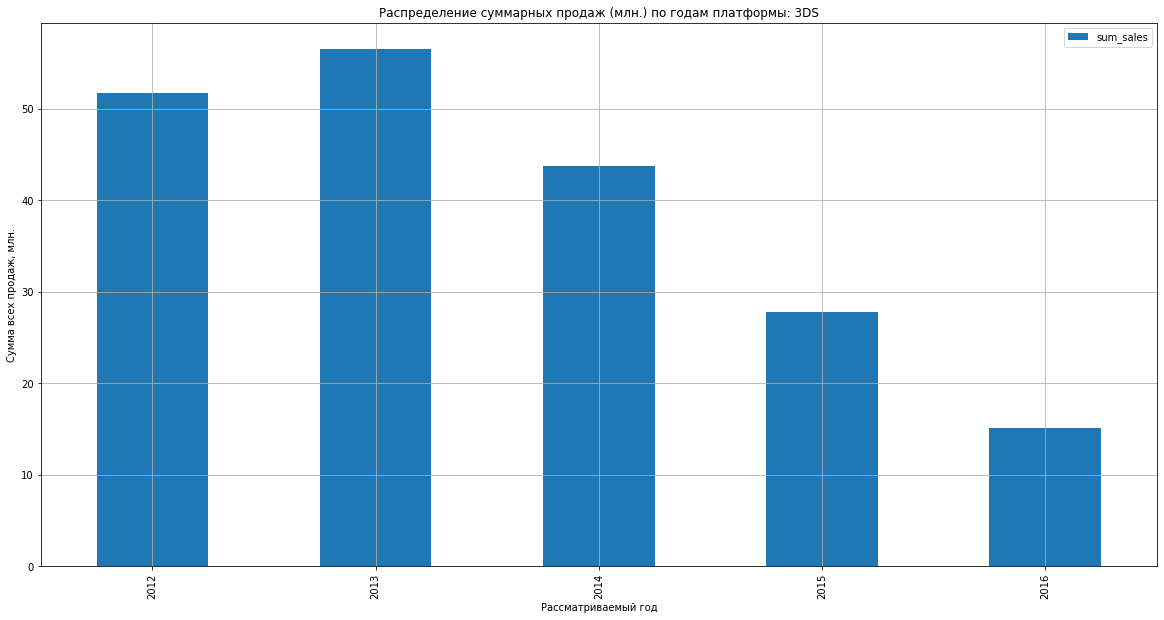

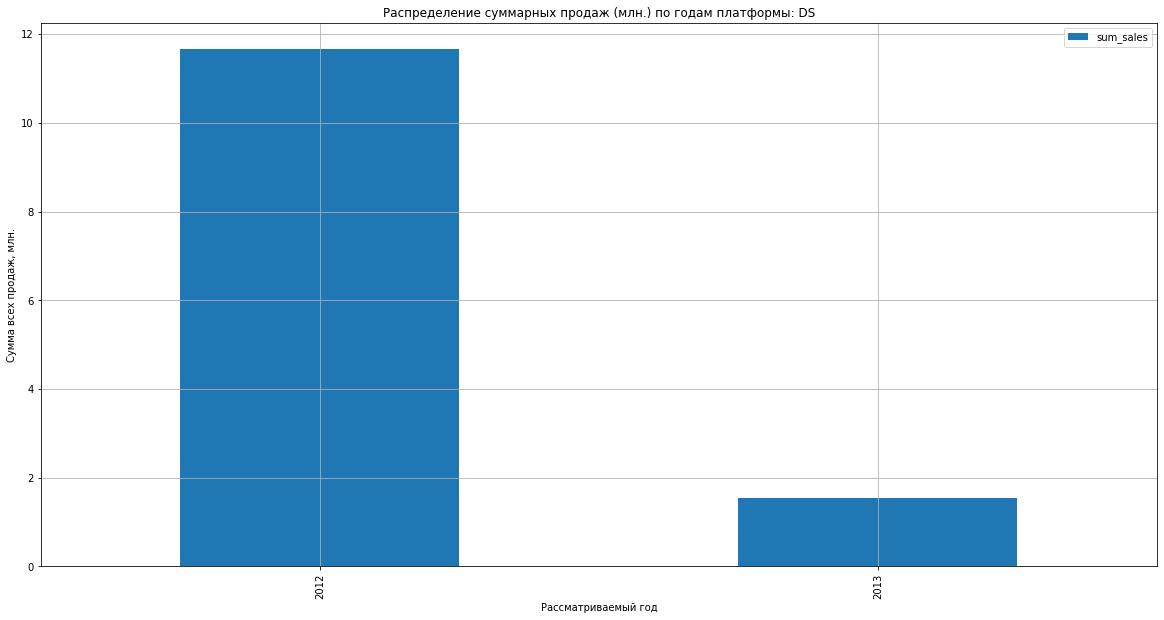

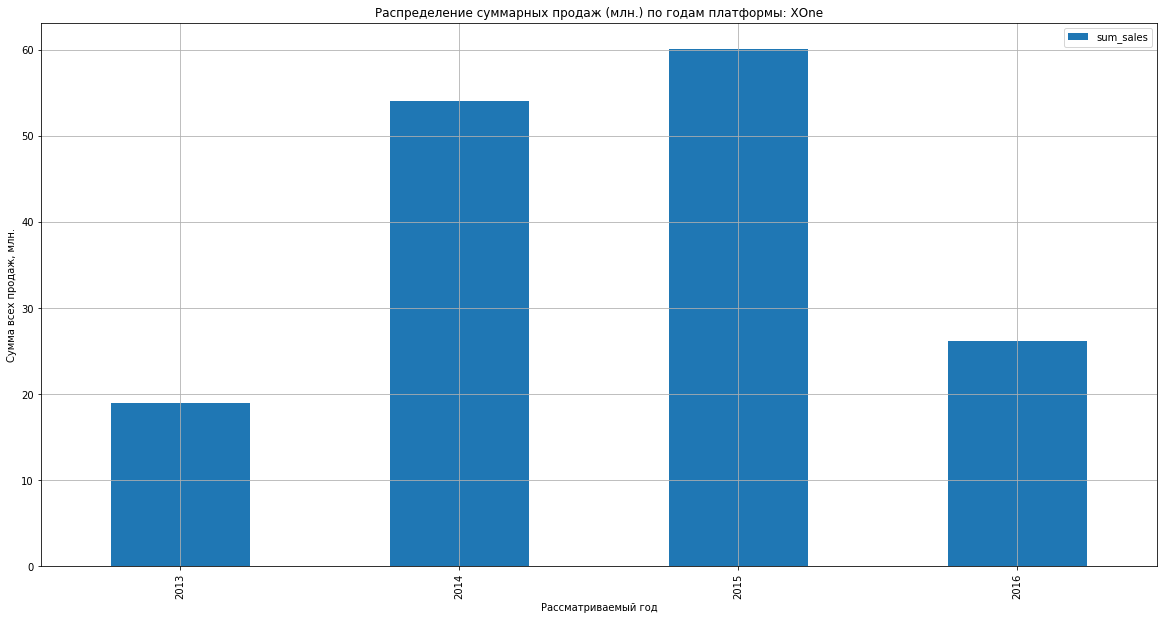

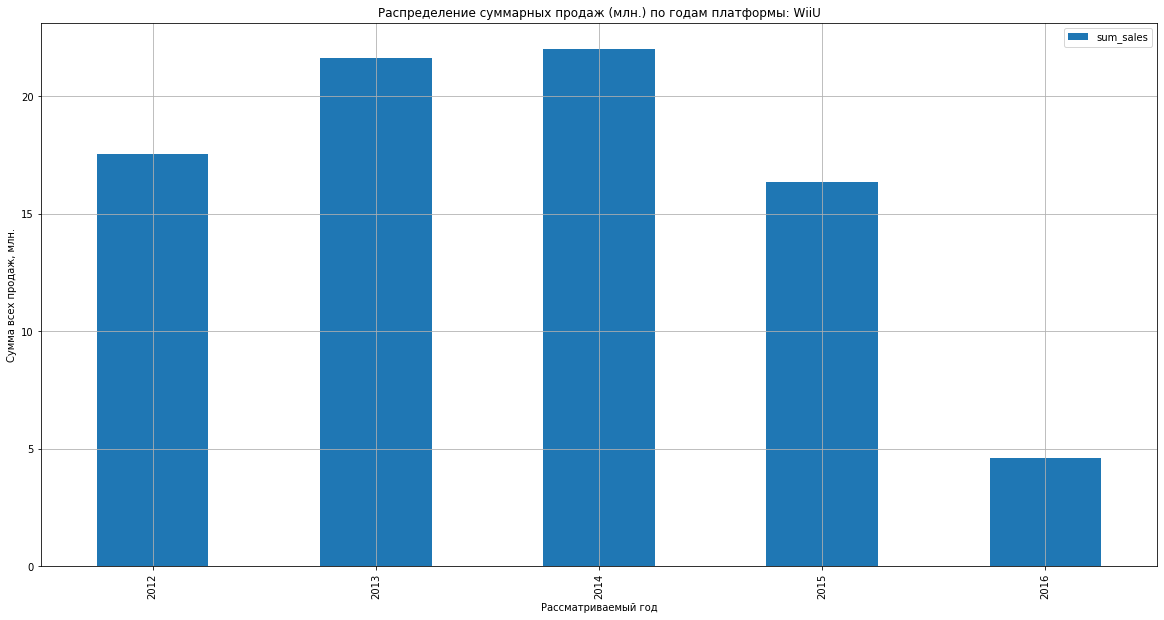

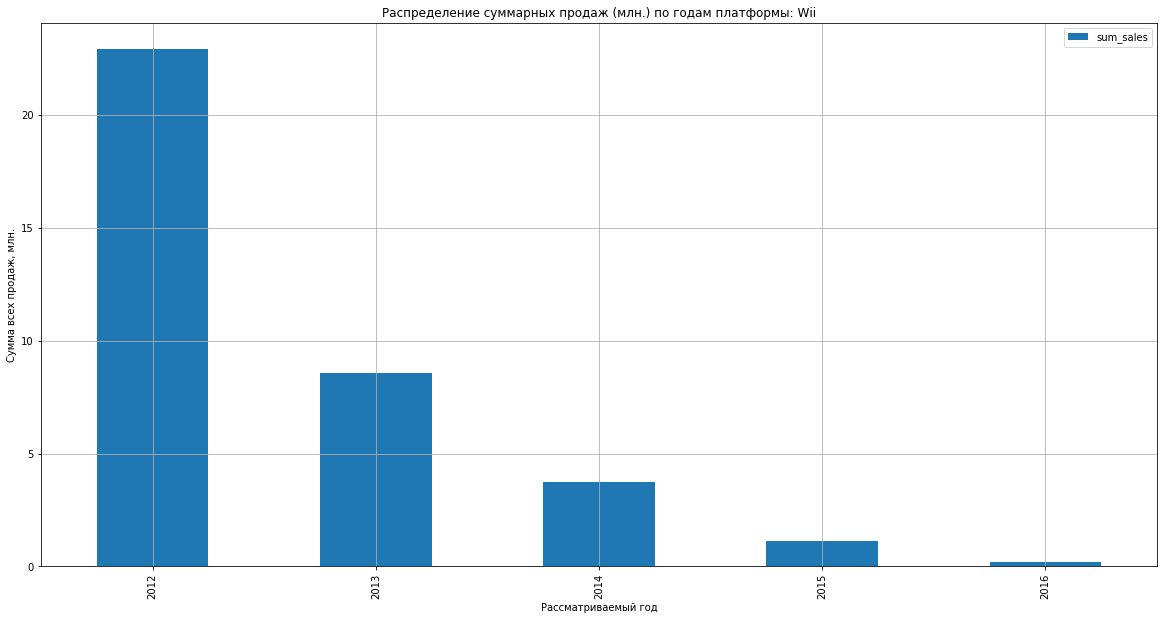

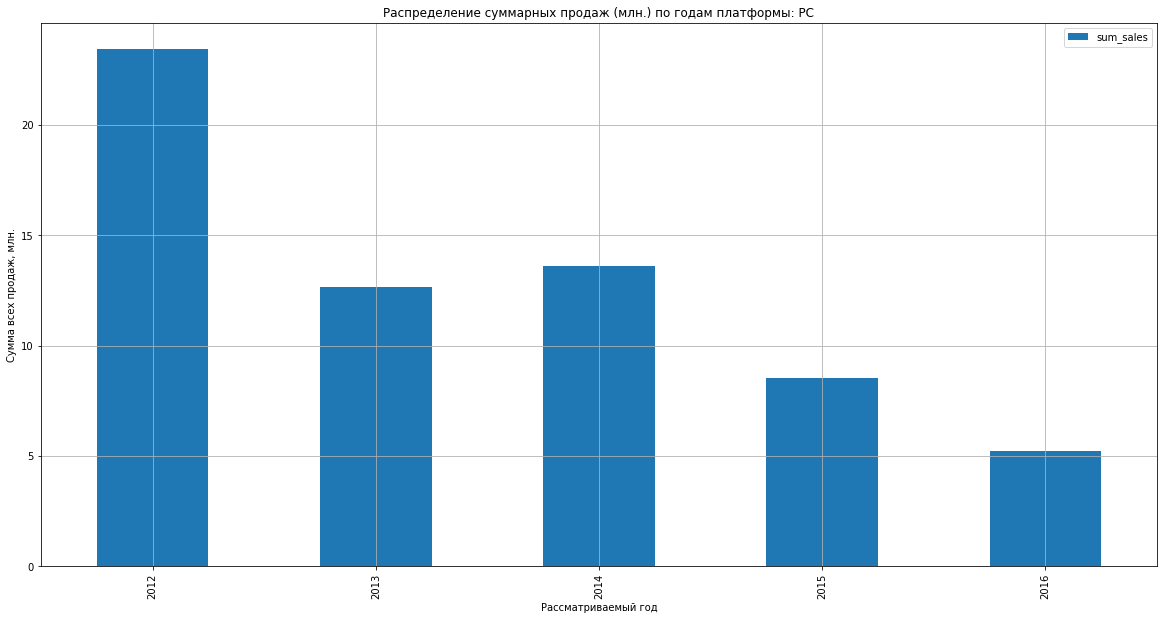

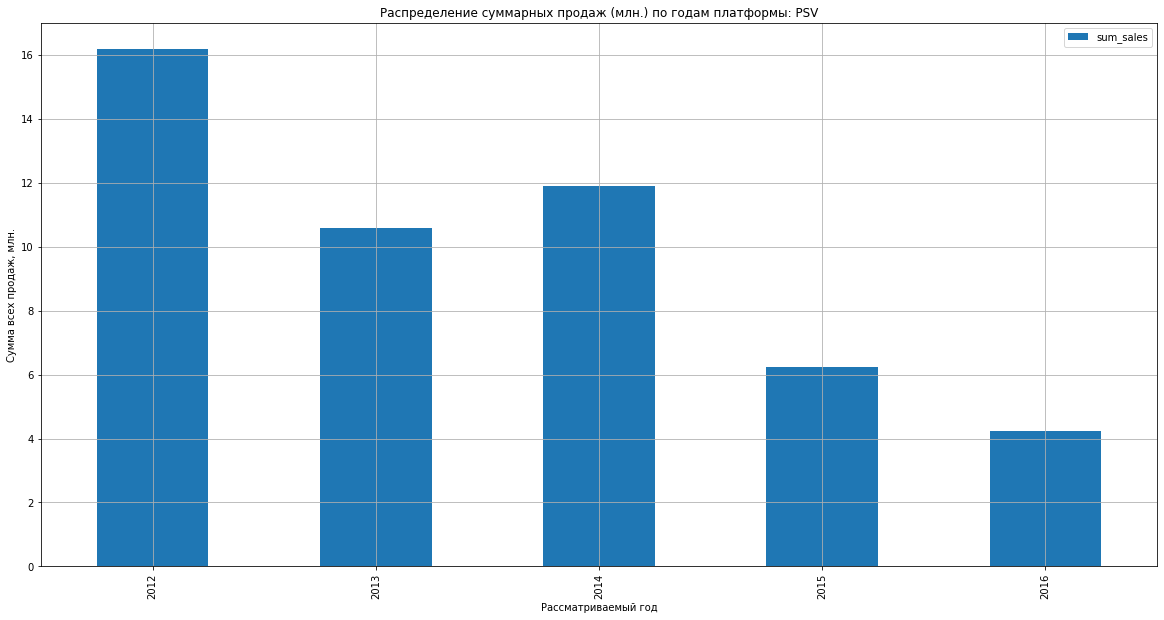

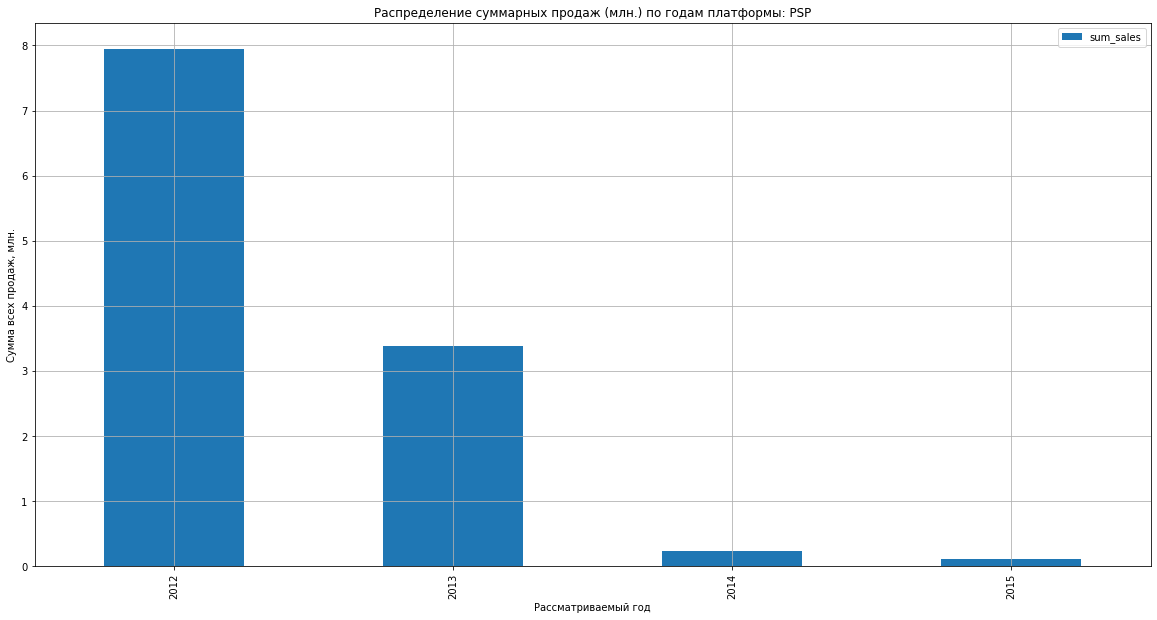

In [251]:
#To determine the leading platform, I will analyze all those releasing games since 2012
for i in data.query('year_of_release >= 2012')['platform'].unique():#Cycle across all platforms releasing games since 2012
    ax = (data.loc[(data['platform'] == i) & (data['year_of_release'] >= int(2012))]#I make a slice of data by platform 
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')#I group the table by year of release for each I calculate the amount of sales by platform
     .plot(title = 'Distribution of total sales (millions) by platform years: {:}'.format(i) , kind='bar', figsize=(20, 10), grid=True, legend=True))
    ax.set_ylabel('The sum of all sales, mln.')
    ax.set_xlabel('Year in question')

The overall picture for the current period is sad - all platforms are losing sales. There are no potentially profitable platforms (judging by the distributions), but since there are gaps for 2016, then: in 1st place is PS4, and in second place is XOne, you can still add 3DS and PC, they can still hold out at an acceptable level of sales in 2017. If you want to buy shares of a manufacturer from existing platforms, then I would recommend that you generally do not invest in the video game industry in 2016.

I'm building a box-and-mustache chart of global game sales by platform.

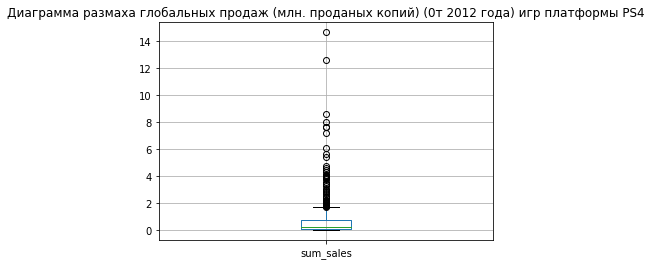

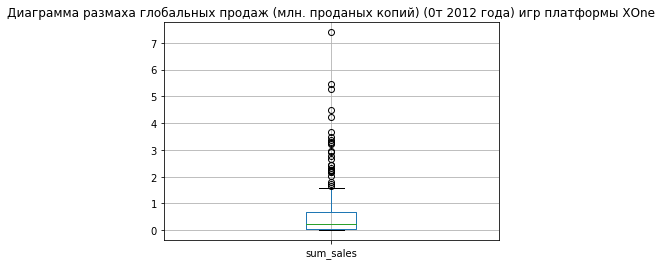

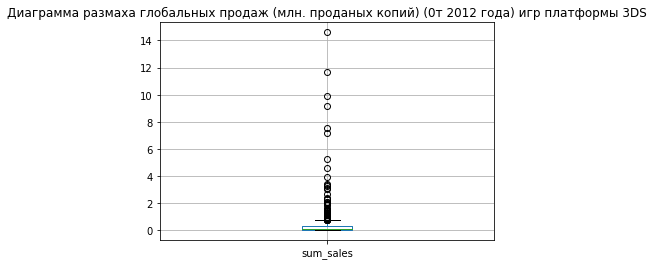

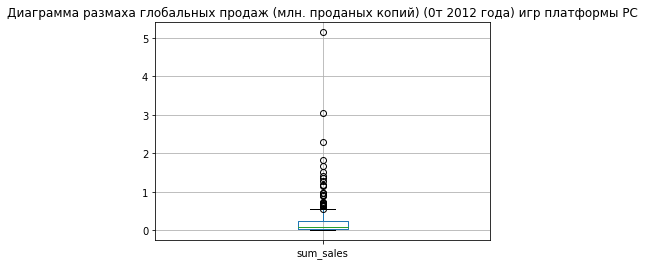

In [252]:
import matplotlib.pyplot as plt#import matplotlib library
top_platform_2016 = ['PS4', 'XOne', '3DS', 'PC']#I single out our additional in a separate list
for i in top_platform_2016:#I add information about months in boxplots in a loop for each month
    plt.title('Diagram of the range of global sales (million copies sold) (0t 2012) of platform games {:}'.format(i))#Name of the month
    data.query('year_of_release >= 2012').loc[data['platform']==i].boxplot(column=['sum_sales'])#Building a mustache box
    plt.show()

Judging by the range diagrams, I want to study in more detail the anomalously sold lots, let's see the names of the games:

In [253]:
for i in top_platform_2016:
    print(i)
    print(data.loc[(data['platform']==i)&(data['sum_sales']>7)]['name'])#We look at the values \u200b\u200bgreater than 14, I determined this from the diagram
    print()

PS4
31          Call of Duty: Black Ops 3
42                 Grand Theft Auto V
77                            FIFA 16
87       Star Wars Battlefront (2015)
92     Call of Duty: Advanced Warfare
94                            FIFA 17
105                         Fallout 4
Name: name, dtype: object

XOne
99    Call of Duty: Black Ops 3
Name: name, dtype: object

3DS
33                           Pokemon X/Pokemon Y
40                                  Mario Kart 7
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire
53                           Super Mario 3D Land
62                       New Super Mario Bros. 2
73                     Animal Crossing: New Leaf
96           Super Smash Bros. for Wii U and 3DS
108                             Pokemon Sun/Moon
Name: name, dtype: object

PC
85    The Sims 3
Name: name, dtype: object



In [254]:
print(data.query('year_of_release >= 2012').loc[(data['platform']=='XOne')&(data['sum_sales']>5)]['name'])#The XOne platform stands out from the rest, we will consider it separately

99          Call of Duty: Black Ops 3
165                Grand Theft Auto V
179    Call of Duty: Advanced Warfare
Name: name, dtype: object


In abnormally large sales on all leading platforms, almost the same games. While the less successful platforms have slightly different games, there are some similarities. Games of all platforms are copied for sale up to 1 million times, while the leading platforms have much more emissions than the bulk, they then raise the top platforms in terms of rating. Most likely, users choose the game more than the platform on which to play, while some platforms are more optimized for a popular game - they have an advantage over others.

Sales analysis of the popular platform PS4 games since 2012. I build scatterplots and find Pearson's correlation coefficients.

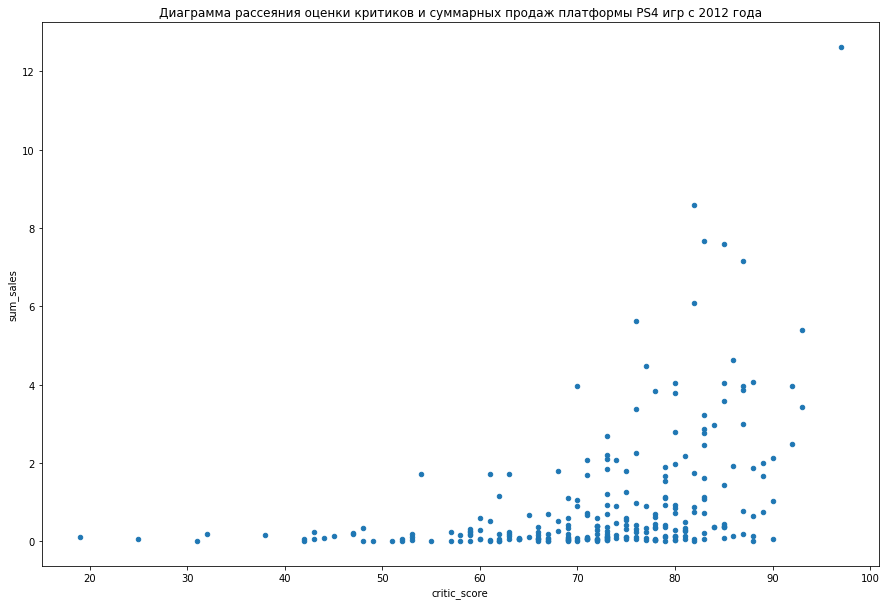

In [255]:
data.query('year_of_release >= 2012').loc[(data['platform']=='PS4')&(data['critic_score']>=0)].plot(title = 'Scatterplot of critics scores and total sales of PS4 games platform since 2012' , figsize=(15, 10), x='critic_score', y='sum_sales', kind='scatter')#Building a scatterplot

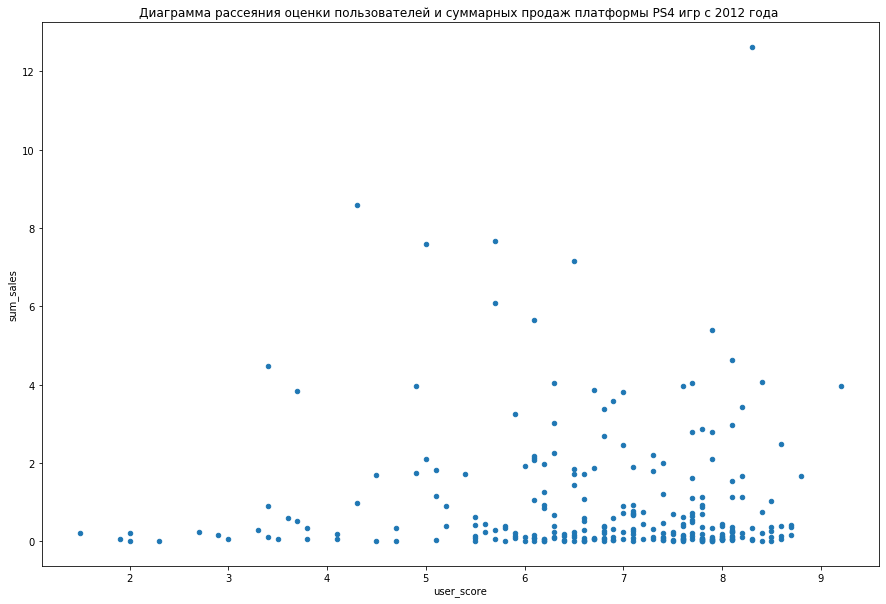

In [256]:
data.query('year_of_release >= 2012').loc[(data['platform']=='PS4')&(data['user_score']>=0)].plot(title = 'Scatterplot of user ratings and total sales of PS4 games platform since 2012 ' , figsize=(15, 10), x='user_score', y='sum_sales', kind='scatter')#Building a scatterplot

In [257]:
data.query('year_of_release >= 2012').loc[(data['platform']=='PS4')&(data['user_score']>=0)&(data['critic_score']>=0)][['critic_score', 'user_score', 'sum_sales']].corr()#Plot Pearson's correlation coefficients

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


The rating of critics affects the opinion of users more than the rating of other users (user rating does not linearly affect sales in principle), but still the influence of both ratings is insignificant, since there are many games with good ratings from both critics and users, but have not proven myself.

I will check the same data, but for other platforms.

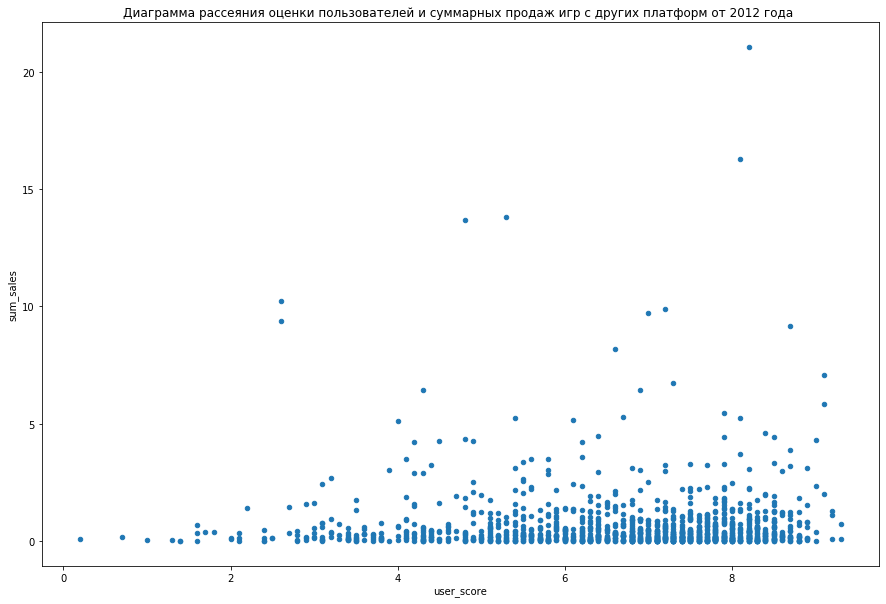

In [258]:
data.query('year_of_release >= 2012').loc[(data['platform']!='PS4')&(data['user_score']>=0)].plot(title = 'Scatterplot of user ratings and total sales of games from other platforms from 2012 ' , figsize=(15, 10), x='user_score', y='sum_sales', kind='scatter')#Building a scatterplot

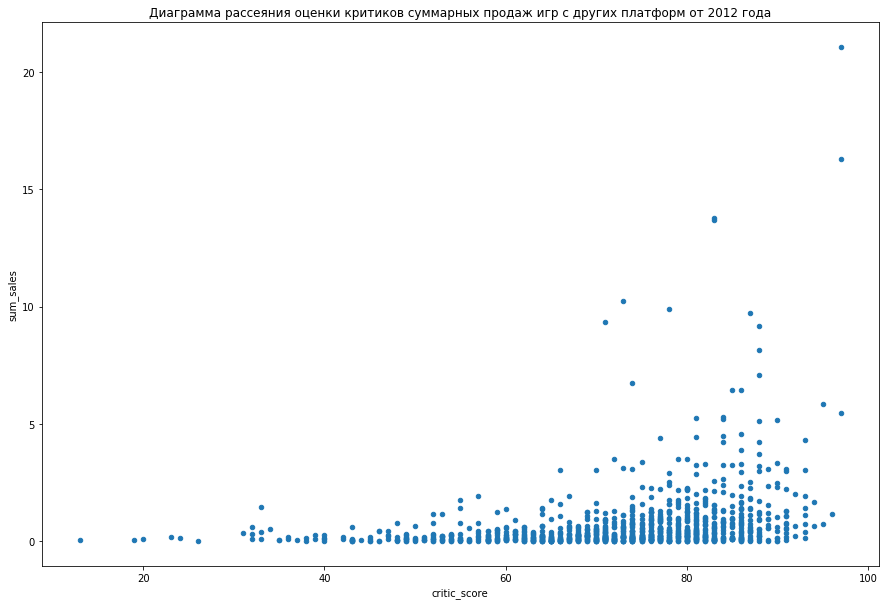

In [259]:
data.query('year_of_release >= 2012').loc[(data['platform']!='PS4')&(data['critic_score']>=0)].plot(title = 'Scatterplot of critics scores of total sales of games from other platforms in 2012' , figsize=(15, 10), x='critic_score', y='sum_sales', kind='scatter')#Building a scatterplot

In [260]:
data.query('year_of_release >= 2012').loc[(data['platform']!='PS4')&(data['user_score']>=0)&(data['critic_score']>=0)][['critic_score', 'user_score', 'sum_sales']].corr()#Plot Pearson's correlation coefficients

,critic_score,user_score,sum_sales
critic_score,1.000000,0.509054,0.282631
user_score,0.509054,1.000000,0.009969
sum_sales,0.282631,0.009969,1.000000


As can be seen from the charts and coefficients, users of a popular platform give more preference to critics' ratings when choosing a game than users of other platforms, while the ratings of other users still do not influence the choice of a game.

Consider the distribution of games by genre.

Text(0.5, 0, 'Рассматриваемый Жанр')

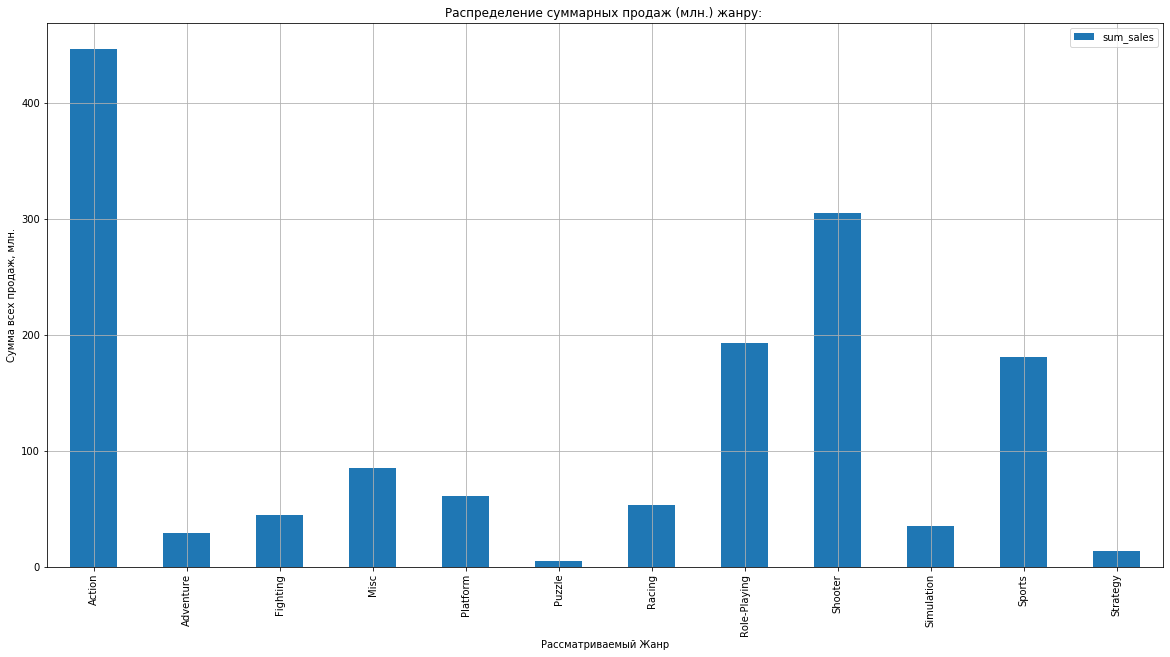

In [261]:
ax = (data.loc[(data['year_of_release'] >= int(2012))]#I slice the data by year
 .pivot_table(index='genre', values='sum_sales', aggfunc='sum')#I group the table by genre for each I calculate the amount of sales
 .plot(title = 'Distribution of total sales (millions) by genre: ' , kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('The sum of all sales, mln.')
ax.set_xlabel('Genre in question')

Building an interactive range chart

In [262]:
pip install chart_studio plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [263]:
from plotly.offline import iplot
import cufflinks as cf
cufflinks.go_offline()
# Installing a global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
from plotly.offline import iplot#Building an interactive mustache box
data.query('year_of_release >= 2012').pivot(columns='genre', values='sum_sales').iplot(
        kind='box',
        yTitle='Sales million.',
        title='Scope charts (0t 2012), we are interested in genres: Action, Role-Playing, Shooter, Sports')#Building an interactive range chart

In [264]:
for i in gh:#For all unique platforms since 2012
    print(i)#Browse the top selling games
    print(data.query('year_of_release >= 2012').loc[(data['genre']==i)&(data['sum_sales']>20)]['name'])#We look at values more than 20, I determined this from the diagram
    print()

PS2
Series([], Name: name, dtype: object)

X360
Series([], Name: name, dtype: object)

PS3
Series([], Name: name, dtype: object)

Wii
Series([], Name: name, dtype: object)

DS
Series([], Name: name, dtype: object)

PS
Series([], Name: name, dtype: object)



In [265]:
top_genre = ['Action', 'Role-Playing', 'Shooter', 'Sports']
for i in top_genre:
    print('Sales figures for zharn',i)#Browse the top selling games
    f = data.query('year_of_release >= 2012').loc[(data['genre']==i)].pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'mean', 'median', 'count'])#I group the table by genre for each I calculate the amount of sales
    print(f)#We look at the values
    print()

Показатели продаж для жарна Action
             sum      mean    median     count
       sum_sales sum_sales sum_sales sum_sales
genre                                         
Action    446.41  0.428828      0.12      1041

Показатели продаж для жарна Role-Playing
                   sum      mean    median     count
             sum_sales sum_sales sum_sales sum_sales
genre                                               
Role-Playing     192.8  0.521081      0.14       370

Показатели продаж для жарна Shooter
              sum      mean    median     count
        sum_sales sum_sales sum_sales sum_sales
genre                                          
Shooter    304.75  1.285865      0.43       237

Показатели продаж для жарна Sports
             sum      mean    median     count
       sum_sales sum_sales sum_sales sum_sales
genre                                         
Sports    181.07  0.675634      0.24       268



The most profitable genres are Action, Role-Playing, Shooter, Sports. High-selling genres stand out from the rest. Action genre is the most popular. At the same time, the Action genre has the smallest indicators in terms of average and median, which means that not all Action games are in high demand, while Shooter games have the largest average and median sales, which means that Shooter games are the most in demand and the likelihood that Shooter game will be sold much higher than the probability of Action games.

Most games were produced in 2008 and 2009. Not all date periods are important for analysis, since until 1991 the number of games produced was consistently low, since our task is forecasting and, most likely, users hardly play games so often before 1991, both because there are few of them and because of due to their old age, they are significantly inferior to modern games, so I think that for our analysis, games before 1991 are not important. The characteristic period for which new platforms appear and old ones disappear is 4-5 years. The overall picture for the current period is sad - all platforms are losing sales. There are no potentially profitable platforms, but there are 2 platforms that are losing sales the least: PS4 in 1st place, and XOne in 2nd place, they can still hold out at an acceptable level of sales in 2017. In abnormally large sales on all leading platforms, almost the same games. While the less successful platforms have slightly different games, there are some similarities. Games of all platforms are copied for sale up to 1 million times, while the leading platforms have much more emissions than the bulk, they then raise the top platforms in terms of rating. Most likely, users choose the game more than the platform on which to play, while some platforms are more optimized for a popular game - they have an advantage over others.

<a id='3'></a>

# Compiling a portrait of a user in each region

I define the most popular platforms (top 5), for users of different regions.

In [266]:
gh = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']#I create a list of sales by region
for i in gh:#For each region
    dd = pd.DataFrame(data.query('year_of_release >= 2012').pivot_table(index='platform', values=i, aggfunc='sum'))#I find the amount of sales by slice from 2012
    print('Top 5 platforms (as of 2012)',i)
    print(dd[i].sort_values(ascending = False).head(5))#Conclusion top 5
    print()

Топ 5 платформ (от 2012 года) na_sales
platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
Name: na_sales, dtype: float64

Топ 5 платформ (от 2012 года) eu_sales
platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
Name: eu_sales, dtype: float64

Топ 5 платформ (от 2012 года) jp_sales
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Топ 5 платформ (от 2012 года) other_sales
platform
PS4     48.35
PS3     43.41
X360    20.49
XOne    14.27
3DS      8.90
Name: other_sales, dtype: float64



The top of the list is often occupied by PS4, PS3, X360. In general, there is no significant difference in the top 5 platforms by region, only Japan stands out from the whole list, where WiiU got into the top 5, and 3DS in first place, which is not like the rest. Judging by the sales shares, it can be concluded that in North America and Europe and other countries, the top 3 and top 2.2, respectively, have a large gap from other platforms in terms of sales, that is, there are top platforms competing with each other, while in Japan there is a large gap between the platform taking first place and the rest, that is, in Japan there is a pronounced leader among the platforms that does not have worthy competitors.

In [267]:
gh = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']#I create a list of sales by region
for i in gh:#For each region
    dd = pd.DataFrame(data.query('year_of_release >= 2012').pivot_table(index='genre', values=i, aggfunc='sum'))#I find the amount of sales by slice from 2012
    print('Top 5 genres (as of 2012)',i)
    print(dd[i].sort_values(ascending = False).head(5))#Conclusion top 5
    print()

Топ 5 жанров (от 2012 года) na_sales
genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Топ 5 жанров (от 2012 года) eu_sales
genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Топ 5 жанров (от 2012 года) jp_sales
genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

Топ 5 жанров (от 2012 года) other_sales
genre
Action          51.76
Shooter         37.26
Sports          22.44
Role-Playing    14.83
Misc             7.67
Name: other_sales, dtype: float64



In all the regions presented, the top 3 does not change; Japan can be singled out separately, the top 5 of which is quite different from the rest. The first 2 genres from the top in all countries stand out from the rest.

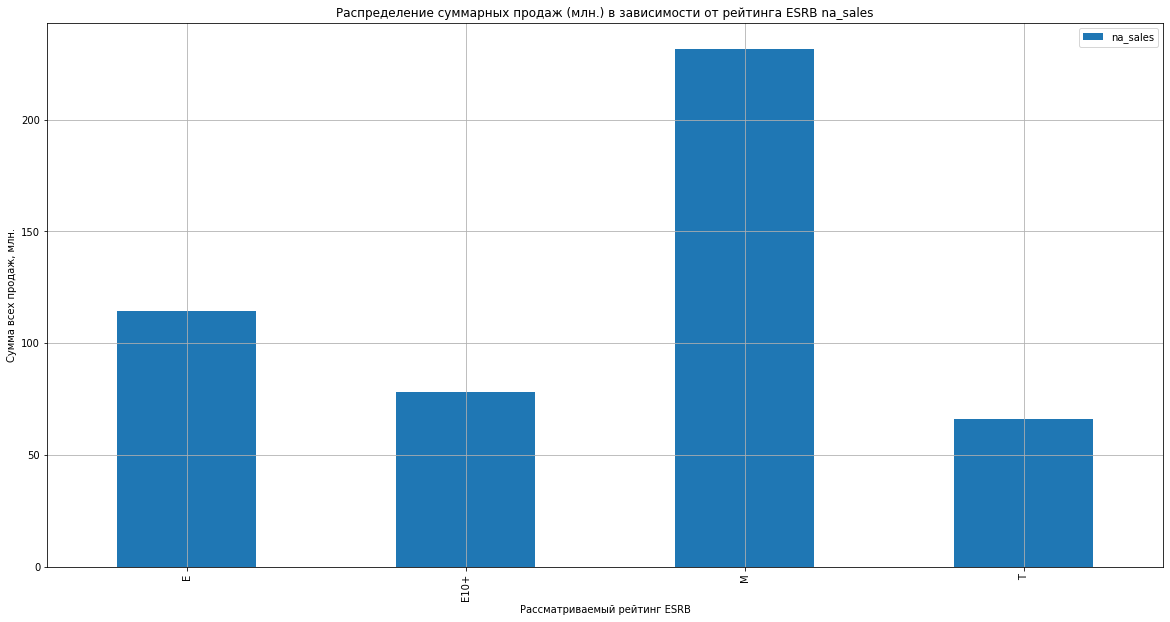

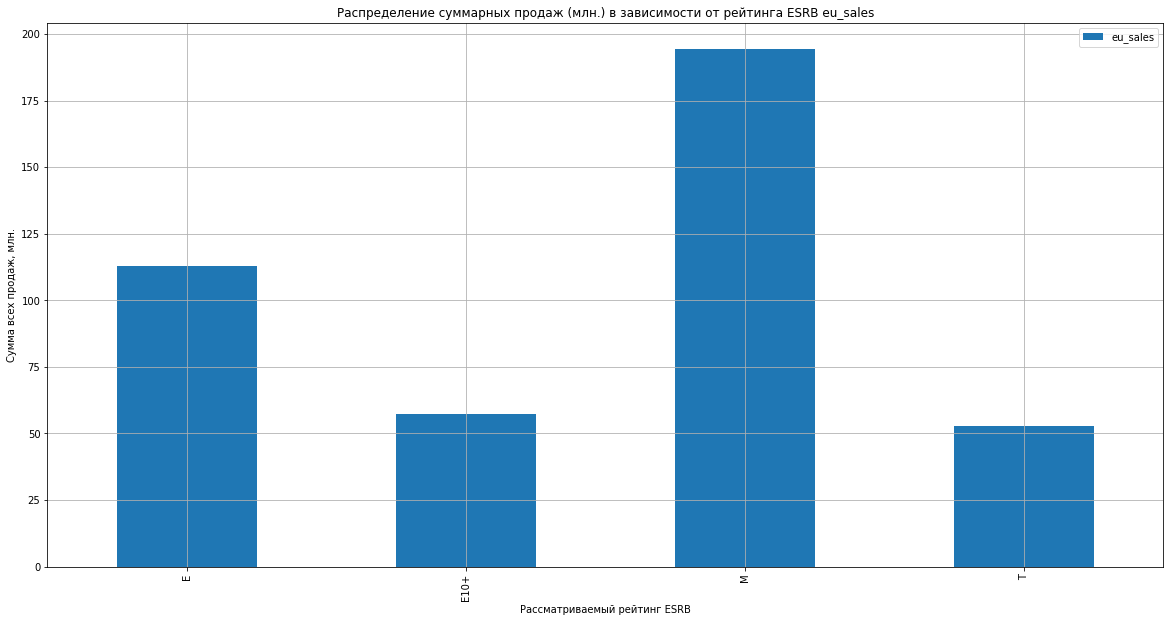

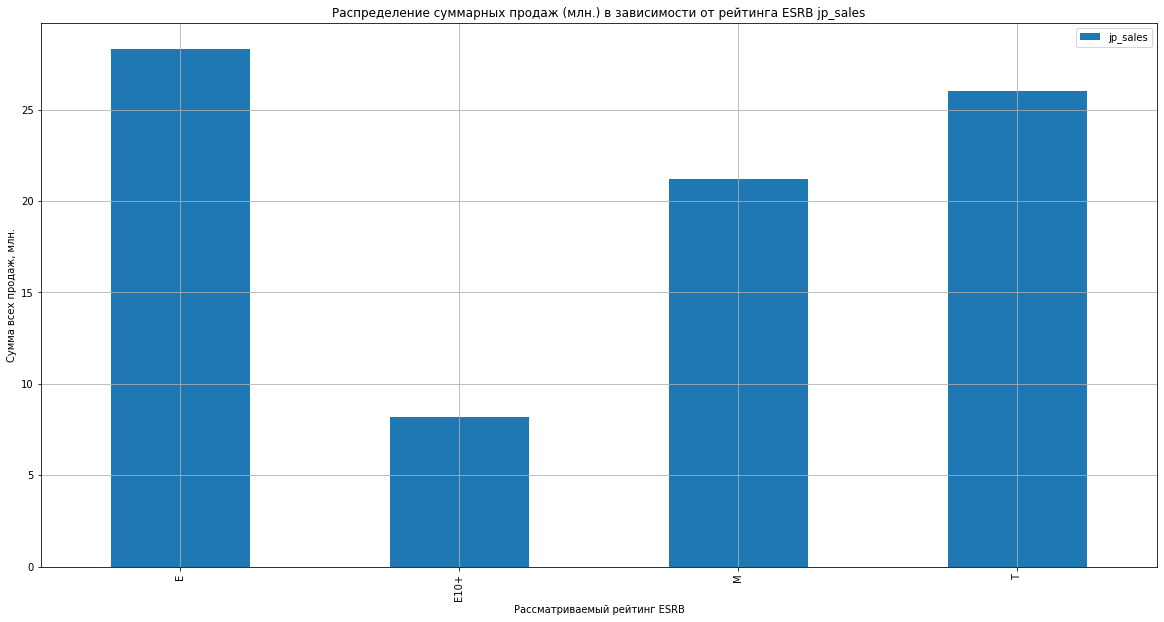

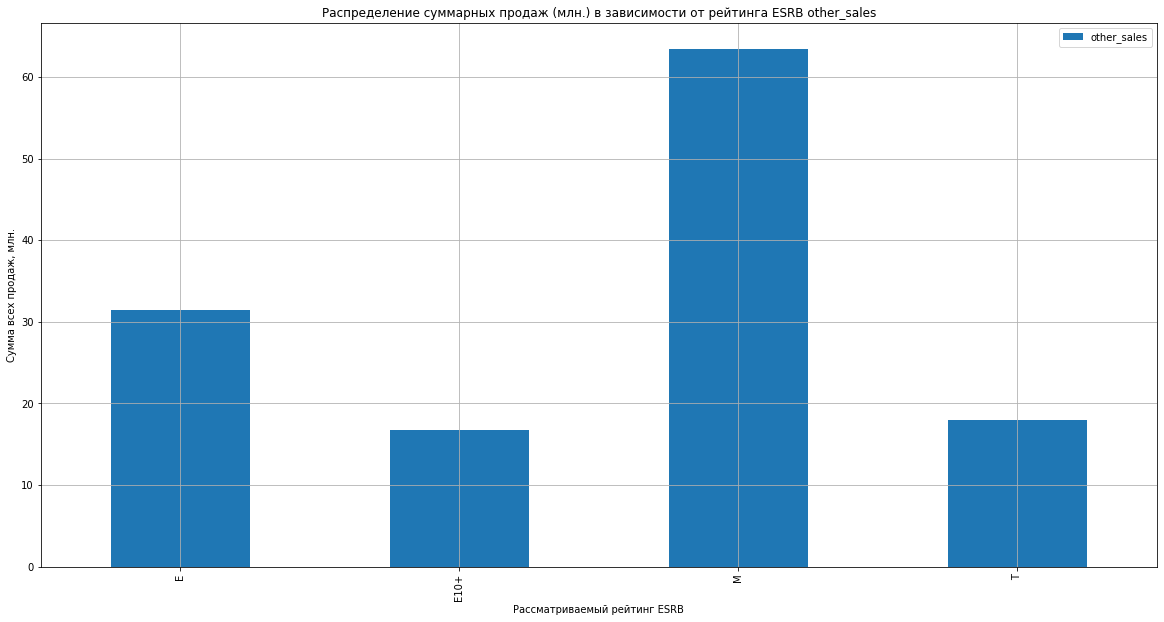

In [268]:
gh = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']#I create a list of sales by region
for i in gh:#For each region
    ax = (data.loc[(data['year_of_release'] >= int(2012))]#I slice the data by year
     .pivot_table(index='rating', values=i, aggfunc='sum')#I group the table by genre for each I calculate the amount of sales
     .plot(title = 'Distribution of total sales (million) depending on the rating ESRB {:}'.format(i) , kind='bar', figsize=(20, 10), grid=True, legend=True))
    ax.set_ylabel('The sum of all sales, million.')
    ax.set_xlabel('ESRB rating in question')

The ESRB rating for sales in a particular region is affected as follows:
    Users from North America and Europe buy games rated M, then E, E10+, T in descending order;
    Users from other regions are somewhat different and the distribution of sales by rating is as follows: M, E, T, E10+;
    Users from Japan stand out the most, buying T and E rated games the most, followed by M and E10+.

Conclusion: In general, the top 5 by region is approximately the same, but in Japan everything differs quite significantly.
    North American User Profile: More often than not, you'll find a user who plays Action on the X360 platform, ESRB-rated M games,
    profile of a user from Europe: most often you can find a player who plays Action on the PS4 platform in games with an ESRB rating of M,
    profile of a user from Japan: most often you can find a player who plays Role-Playing on the 3DS platform in games with an ESRB rating of E or T,
    international user profile: More often than not, you will find a player who plays Action on the PS4 platform in games with an ESRB rating of M. Among the platforms in Japan there is a leader, while in all other platforms there are competitors among the leaders.

<a id='4'></a>

# Hypothesis testing

To test hypotheses, I will use Student's t-test. Checking that the average user ratings of the Xbox One and PC platforms are the same is a test of the equality of the averages of the two populations, so I form a two-sided hypothesis. H0 is the hypothesis that the means of the two populations are equal, then the alternative hypothesis H1 is not equal. I formed H0 with an equals sign, since we expect the sample means to be equal, so the alternative hypothesis would be to tell us that they are not equal.

In [269]:
print('Number of ratings for the XOne platform',len(data.query('year_of_release >= 2012').loc[(data['platform'] == 'XOne')&(data['user_score']>=0)]))
print('Number of ratings for the PC platform',len(data.query('year_of_release >= 2012').loc[(data['platform'] == 'PC')&(data['user_score']>=0)]))

Количество оценок для платформы XOne 182
Количество оценок для платформы PC 211


The samples are not large, so I choose a significance level of 5%.

In [270]:
from scipy import stats as st#importing stats
alpha = .05#critical level of statistical significance

k = data.query('year_of_release >= 2012').loc[(data['platform'] == 'XOne')&(data['user_score']>=0)]['user_score']#I assign a sample of user ratings from 2012 for XOne to the variable k
j = data.query('year_of_release >= 2012').loc[(data['platform'] == 'PC')&(data['user_score']>=0)]['user_score']#I assign to variable j a sample of user ratings from 2012 for PC
results = st.ttest_ind(
    k,j)
    
print('p-value: ', results.pvalue)#I print p-value
    
if (results.pvalue < alpha):#Finding the answer to our question 
    print("We reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis")

p-значение:  0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


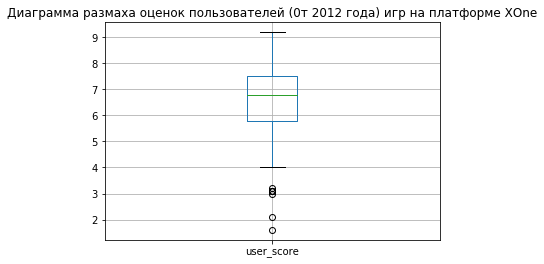

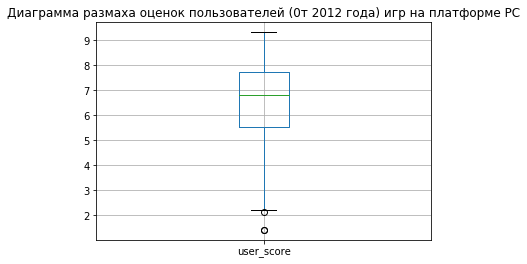

In [271]:
plt.title('Range chart of user ratings (0t 2012) of games on the XOne platform')#Chart Title
data.query('year_of_release >= 2012').loc[(data['platform'] == 'XOne')&(data['user_score']>=0)].boxplot(column=['user_score'])#Building a mustache box
plt.show()
plt.title('Range chart of user ratings (0t 2012) of games on the PC platform')#Chart Title
data.query('year_of_release >= 2012').loc[(data['platform'] == 'PC')&(data['user_score']>=0)].boxplot(column=['user_score'])#
plt.show()

Conclusion: The average user ratings of the Xbox One and PC platforms are the same.

To test hypotheses, I will use Student's t-test. Checking that the average user ratings of the Action and Sport genres are different is also checking the equality of the averages of the two general populations (if the alternative hypothesis is true, then we will confirm the hypothesis), so I form a two-sided hypothesis. H0 is the hypothesis that the means of the two populations are equal, then the alternative hypothesis H1 is not equal. I formed H0 with an equals sign, since we expect the sample means to be equal, so the alternative hypothesis would be to tell us that they are not equal.

In [272]:
print('Number of ratings for genre Action',len(data.query('year_of_release >= 2012').loc[(data['genre'] == 'Action')&(data['user_score']>=0)]))
print('Number of ratings for the Sports genre',len(data.query('year_of_release >= 2012').loc[(data['genre'] == 'Sports')&(data['user_score']>=0)]))

Количество оценок для жанра Action 531
Количество оценок для жанра Sports 195


Since one of the samples is still the same about 200 values, I do not change the criterion.

In [273]:
alpha = .05#critical level of statistical significance

k = data.query('year_of_release >= 2012').loc[(data['genre'] == 'Action')&(data['user_score']>=0)]['user_score']#I assign a sample of user ratings from 2012 for XOne to the variable k
j = data.query('year_of_release >= 2012').loc[(data['genre'] == 'Sports')&(data['user_score']>=0)]['user_score']#I assign to variable j a sample of user ratings from 2012 for PC
results = st.ttest_ind(
    k,j)
    
print('p-value: ', results.pvalue)#I print p-value
    
if (results.pvalue < alpha):#Finding the answer to our question 
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение:  1.1405639632267916e-26
Отвергаем нулевую гипотезу


Conclusion: the average user ratings of the Action and Sport genres are different.

<a id='5'></a>

# General conclusion

Since the approximate period of appearance of new and disappearance of old platforms is 4-5 years, for forecasting we need a period starting from 2014, according to this construction, for this period, our distribution histograms.

Text(0.5, 0, 'Жанр')

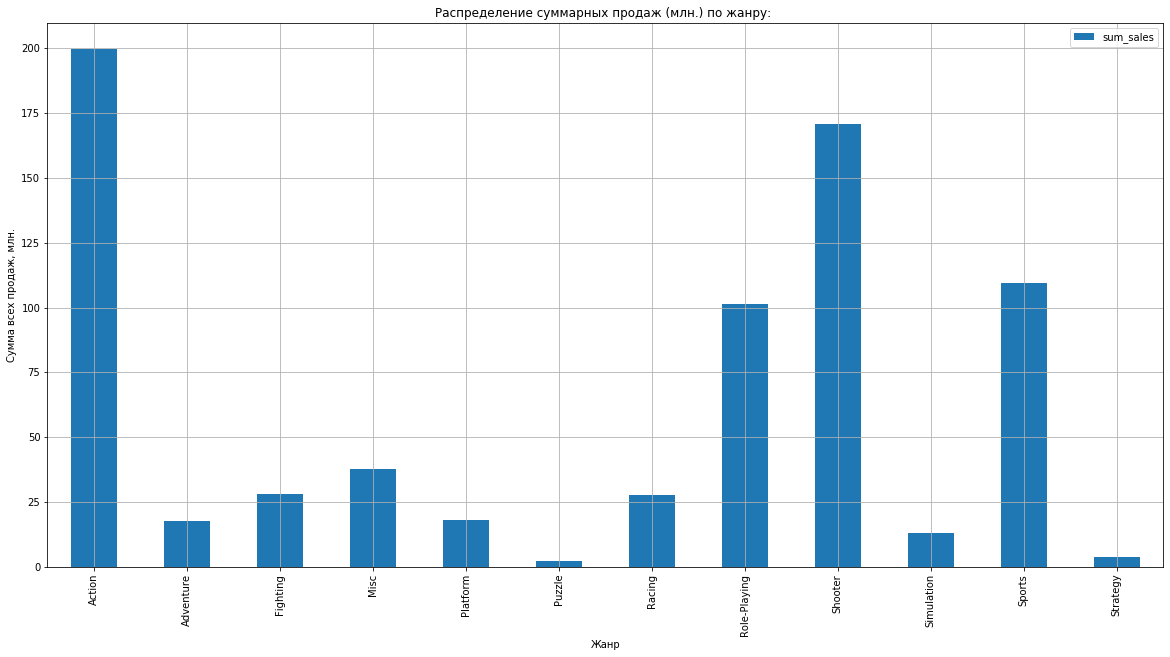

In [275]:
ax=(data.loc[(data['year_of_release'] >= int(2014))]#I slice the data by year 
 .pivot_table(index='genre', values='sum_sales', aggfunc='sum')#I group the table by genre for each I calculate the amount of sales
 .plot(title = 'Distribution of total sales (millions) by genre: ' , kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('The sum of all sales, mln.')
ax.set_xlabel('Genre')

Text(0.5, 0, 'Платформа')

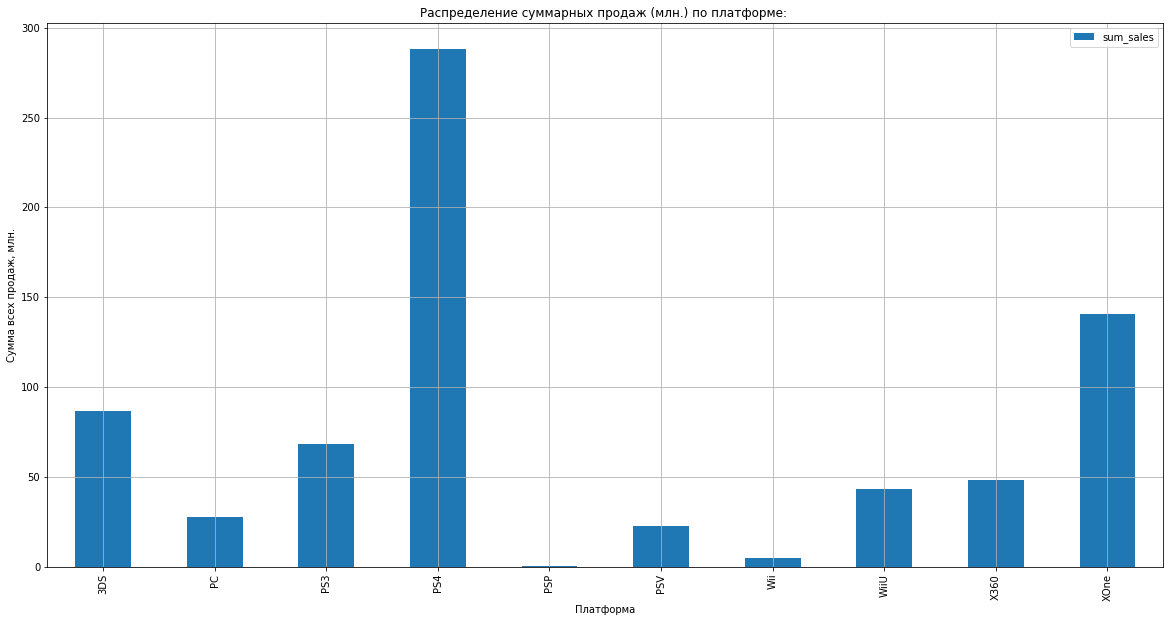

In [276]:
ax=(data.loc[(data['year_of_release'] >= int(2014))]#I slice the data by year 
 .pivot_table(index='platform', values='sum_sales', aggfunc='sum')#I group the table by genre for each I calculate the amount of sales
 .plot(title = 'Distribution of total sales (millions) by platform: ' , kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('The sum of all sales, million.')
ax.set_xlabel('Platform')

Text(0.5, 0, 'Рассматриваемый рейтинг ESRB')

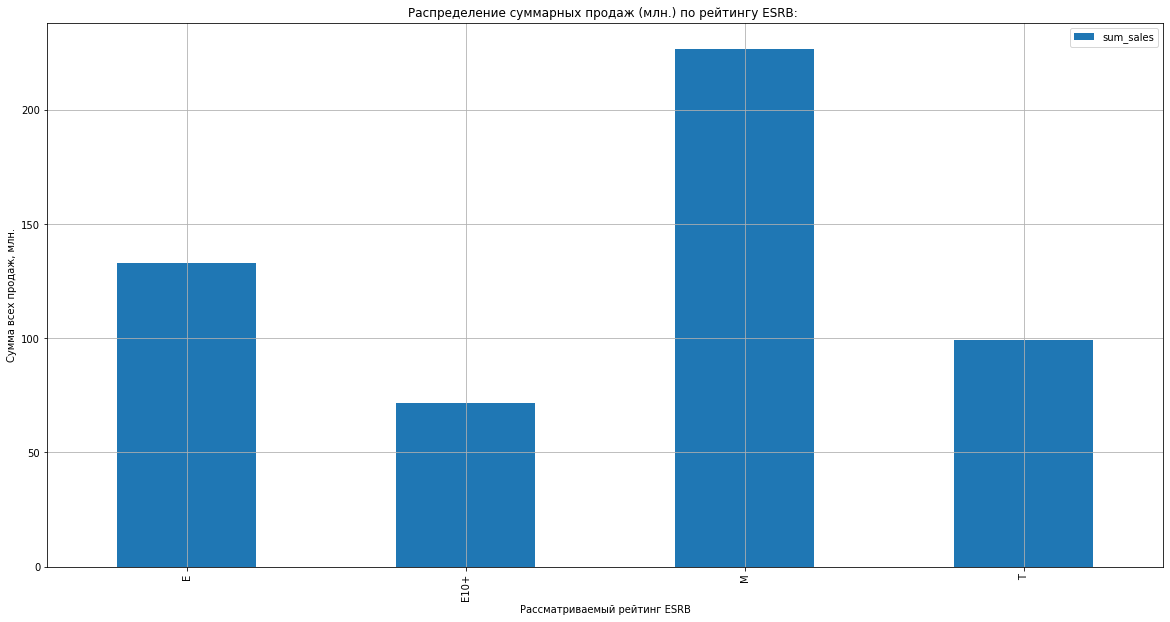

In [277]:
ax=(data.loc[(data['year_of_release'] >= int(2014))]#I slice the data by year 
 .pivot_table(index='rating', values='sum_sales', aggfunc='sum')#I group the table by genre for each I calculate the amount of sales
 .plot(title = 'Distribution of total sales (millions) by ESRB rating: ' , kind='bar', figsize=(20, 10), grid=True, legend=True))
ax.set_ylabel('The sum of all sales, mln.')
ax.set_xlabel('ESRB rating in question')

The data was read and preprocessed. I removed 2 rows from the entire dataframe, as they had gaps in the name of the video game and this is almost impossible to recover. The gaps in the columns have been partially restored by the name of the video game. Blanks have been replaced with indicator value -1 for column type conversion. The unique value 'tbd' was found and analyzed in the 'user_score' column. Partially replaced it by name, and what I could not replace, I counted as a pass, besides, this attribute has very small sales, like other passes. The data is ready for further work with them. Year omissions were also partially replaced by the name column, and the rest were replaced by the indicator year 1000 to cast the column to a convenient type.
  
  Most games were produced in 2008 and 2009. The characteristic period for which new platforms appear and old ones disappear is 4-5 years. The current period was chosen - these are games from 2012. The overall picture for the current period is sad - all platforms are losing sales. There are no potentially profitable platforms, but there are 2 platforms that are losing sales the least: PS4 in 1st place, and XOne in 2nd place, they can still hold out at an acceptable level of sales in 2017. In abnormally large sales on all leading platforms, almost the same games. While the less successful platforms have slightly different games, there are some similarities. Games of all platforms are copied for sale up to 1 million times, while the leading platforms have much more emissions than the bulk, they then raise the top platforms in terms of rating. Most likely, users choose the game more than the platform on which to play, while some platforms are more optimized for a popular game - they have an advantage over others.
  
  In general, the top 5 by region is approximately the same, but in Japan everything differs quite significantly. NA user profile: The most common player to be found playing Action on the X360 platform, ESRB-rated M games, European user profile: The most common player to be found playing Action on the PS4 platform, ESRB-rated M games , user portrait from Japan: more often than others, you can meet a player who plays Role-Playing on the 3DS platform in games with an ESRB rating of E or T, a portrait of a user from other countries: you can often meet a player who plays Action on the PS4 platform in games with an ESRB rating of M. Among the platforms in Japan, there is a leader, while in all other platforms there are competitors among the leaders.
The ESRB rating on sales in a particular region is affected as follows: Users from North America and Europe buy games rated M, then E, E10+, T in descending order; Users from other regions are somewhat different and the distribution of sales by rating is as follows: M, E, T, E10+; Users from Japan stand out the most, buying T and E rated games the most, followed by M and E10+.
  
  Statistical hypotheses were checked, here are the results: the average user ratings of the Xbox One and PC platforms are the same, the average user ratings of the Action and Sport genres are different.

  The patterns that determine the success of the game in all countries in general, which must be taken into account when forecasting for 2017: the most successful platform is PS4, the most successful genre is Action, but the games of the Shooter genre are more bought, the most successful rating from the ESRB organization is M. But for more specific forecasting, it is necessary to take into account the country, take into account that in 8-10 years the platforms lose their relevance. In general, I would recommend waiting until the PS4 manufacturers (since the PS2 was also successful and I believe that they were produced by the same company) release a new platform, observe it and make your own Shooter (since a game with this genre will be bought from you with more likely than an Action game, Action will have to try) with a rating from the ESRB-M organization, having bought some good reviews from critics, as they have little effect on sales.